In [186]:
import pandas as pd
import numpy as np

In [187]:
import re


In [188]:
import matplotlib.pyplot as plt

In [189]:
import scrapy

In [190]:
# Settings for notebook
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
# Show Python version
import platform
platform.python_version()

'3.6.12'

In [191]:
from scrapy.crawler import CrawlerProcess

In [192]:
import json

class JsonWriterPipeline(object):

    def open_spider(self, spider):
        self.file = open('quoteresult.jl', 'w')

    def close_spider(self, spider):
        self.file.close()

    def process_item(self, item, spider):
        line = json.dumps(dict(item)) + "\n"
        self.file.write(line)
        return item

# Webscrapping


In [30]:
import logging

class gratka_spider(scrapy.Spider):
    name = "moj_crawler"
    
    custom_settings = {
        'LOG_LEVEL': logging.WARNING,
        'ITEM_PIPELINES': {'__main__.JsonWriterPipeline': 1}, # Used for pipeline 1
        'FEED_FORMAT':'json',                                 # Used for pipeline 2
        'FEED_URI': 'quoteresult.json'                        # Used for pipeline 2
    } 
    
    def start_requests( self ):
        
            url = 'https://gratka.pl/nieruchomosci/mieszkania/warszawa?page='
            #yield scrapy.Request( url = url, callback = self.parse_front )
           
            for i in range(1, 312):
                yield scrapy.Request(url+str(i),callback=self.parse_front)
        
        
       
    def parse_front( self, response ):
        #course_blocks = response.css( 'div.course-block' )
        #course_links = course_blocks.xpath( './a/@href' )
        links_to_follow = response.css('a.teaserEstate__anchor::attr(href)').extract()
        for url in links_to_follow:
            yield response.follow( url = url,callback = self.parse_pages )
    
#         NEXT_PAGE_SELECTOR ='a.pagination__nextPage::attr(href)' 
#         next_page = response.css(NEXT_PAGE_SELECTOR).extract_first()
#         if next_page:
#             yield scrapy.Request(
#             response.urljoin(next_page),
#             callback=self.parse)      
    
    def parse_pages( self, response ):
          yield {
                'numer_ogloszenia':response.css('span[class=""]::text').extract_first().strip(),
                'tytul': response.css('h1.sticker__title::text').extract_first().strip(),
                'cena': response.css('span.priceInfo__value::text').extract_first().strip(),
                'cena_za_metr': response.css('span.priceInfo__additional::text').extract_first().strip(),
                'lokalizacja':response.css('.parameters__locationLink::text').extract(),
                'atrybuty' : response.xpath('//li/span[not(@*)]/text()')[1:].extract(),  
                'wartosci': response.xpath('//li/b/text()')[3:].extract() 
                #'tags': quote.css('div.tags a.tag::text').extract(),
            }
            
if __name__ == '__main__':
    process = CrawlerProcess({
        'USER_AGENT': 'Mozilla/4.0 (compatible; MSIE 7.0; Windows NT 5.1)'})
    process.crawl(gratka_spider)
    process.start() 



   

2020-10-20 18:38:58 [scrapy.utils.log] INFO: Scrapy 1.5.0 started (bot: scrapybot)
2020-10-20 18:38:58 [scrapy.utils.log] INFO: Versions: lxml 4.5.2.0, libxml2 2.9.10, cssselect 1.1.0, parsel 1.5.2, w3lib 1.21.0, Twisted 20.3.0, Python 3.6.12 |Anaconda, Inc.| (default, Sep  9 2020, 00:29:25) [MSC v.1916 64 bit (AMD64)], pyOpenSSL 19.1.0 (OpenSSL 1.1.1h  22 Sep 2020), cryptography 3.1.1, Platform Windows-10-10.0.19041-SP0
2020-10-20 18:38:58 [scrapy.crawler] INFO: Overridden settings: {'FEED_FORMAT': 'json', 'FEED_URI': 'quoteresult.json', 'LOG_LEVEL': 30, 'USER_AGENT': 'Mozilla/4.0 (compatible; MSIE 7.0; Windows NT 5.1)'}


2020-10-20 18:40:17 [scrapy.core.scraper] ERROR: Spider error processing <GET https://gratka.pl/nieruchomosci/nowe-mieszkanie-warszawa-sluzewiec-ul-bokserska/ob/17604350> (referer: https://gratka.pl/nieruchomosci/mieszkania/warszawa?page=1)
Traceback (most recent call last):
  File "C:\Anaconda3\lib\site-packages\scrapy\utils\defer.py", line 102, in iter_errback
    yield next(it)
  File "C:\Anaconda3\lib\site-packages\scrapy\spidermiddlewares\offsite.py", line 30, in process_spider_output
    for x in result:
  File "C:\Anaconda3\lib\site-packages\scrapy\spidermiddlewares\referer.py", line 339, in <genexpr>
    return (_set_referer(r) for r in result or ())
  File "C:\Anaconda3\lib\site-packages\scrapy\spidermiddlewares\urllength.py", line 37, in <genexpr>
    return (r for r in result or () if _filter(r))
  File "C:\Anaconda3\lib\site-packages\scrapy\spidermiddlewares\depth.py", line 58, in <genexpr>
    return (r for r in result or () if _filter(r))
  File "<ipython-input-30-0d31689

2020-10-20 18:56:16 [scrapy.core.scraper] ERROR: Spider error processing <GET https://gratka.pl/nieruchomosci/nowe-mieszkanie-warszawa-mokotow/ob/18418937> (referer: https://gratka.pl/nieruchomosci/mieszkania/warszawa?page=205)
Traceback (most recent call last):
  File "C:\Anaconda3\lib\site-packages\scrapy\utils\defer.py", line 102, in iter_errback
    yield next(it)
  File "C:\Anaconda3\lib\site-packages\scrapy\spidermiddlewares\offsite.py", line 30, in process_spider_output
    for x in result:
  File "C:\Anaconda3\lib\site-packages\scrapy\spidermiddlewares\referer.py", line 339, in <genexpr>
    return (_set_referer(r) for r in result or ())
  File "C:\Anaconda3\lib\site-packages\scrapy\spidermiddlewares\urllength.py", line 37, in <genexpr>
    return (r for r in result or () if _filter(r))
  File "C:\Anaconda3\lib\site-packages\scrapy\spidermiddlewares\depth.py", line 58, in <genexpr>
    return (r for r in result or () if _filter(r))
  File "<ipython-input-30-0d31689b409b>", line

2020-10-20 18:56:44 [scrapy.core.scraper] ERROR: Spider error processing <GET https://gratka.pl/nieruchomosci/nowe-mieszkanie-warszawa-praga-poludnie-ul-minska-69/ob/18418425> (referer: https://gratka.pl/nieruchomosci/mieszkania/warszawa?page=202)
Traceback (most recent call last):
  File "C:\Anaconda3\lib\site-packages\scrapy\utils\defer.py", line 102, in iter_errback
    yield next(it)
  File "C:\Anaconda3\lib\site-packages\scrapy\spidermiddlewares\offsite.py", line 30, in process_spider_output
    for x in result:
  File "C:\Anaconda3\lib\site-packages\scrapy\spidermiddlewares\referer.py", line 339, in <genexpr>
    return (_set_referer(r) for r in result or ())
  File "C:\Anaconda3\lib\site-packages\scrapy\spidermiddlewares\urllength.py", line 37, in <genexpr>
    return (r for r in result or () if _filter(r))
  File "C:\Anaconda3\lib\site-packages\scrapy\spidermiddlewares\depth.py", line 58, in <genexpr>
    return (r for r in result or () if _filter(r))
  File "<ipython-input-30-

2020-10-20 18:59:24 [scrapy.core.scraper] ERROR: Spider error processing <GET https://gratka.pl/nieruchomosci/nowe-mieszkanie-warszawa-mokotow/ob/18419087> (referer: https://gratka.pl/nieruchomosci/mieszkania/warszawa?page=215)
Traceback (most recent call last):
  File "C:\Anaconda3\lib\site-packages\scrapy\utils\defer.py", line 102, in iter_errback
    yield next(it)
  File "C:\Anaconda3\lib\site-packages\scrapy\spidermiddlewares\offsite.py", line 30, in process_spider_output
    for x in result:
  File "C:\Anaconda3\lib\site-packages\scrapy\spidermiddlewares\referer.py", line 339, in <genexpr>
    return (_set_referer(r) for r in result or ())
  File "C:\Anaconda3\lib\site-packages\scrapy\spidermiddlewares\urllength.py", line 37, in <genexpr>
    return (r for r in result or () if _filter(r))
  File "C:\Anaconda3\lib\site-packages\scrapy\spidermiddlewares\depth.py", line 58, in <genexpr>
    return (r for r in result or () if _filter(r))
  File "<ipython-input-30-0d31689b409b>", line

2020-10-20 19:08:11 [scrapy.core.scraper] ERROR: Spider error processing <GET https://gratka.pl/nieruchomosci/nowe-mieszkanie-warszawa-wola-ul-obozowa/ob/15036222> (referer: https://gratka.pl/nieruchomosci/mieszkania/warszawa?page=299)
Traceback (most recent call last):
  File "C:\Anaconda3\lib\site-packages\scrapy\utils\defer.py", line 102, in iter_errback
    yield next(it)
  File "C:\Anaconda3\lib\site-packages\scrapy\spidermiddlewares\offsite.py", line 30, in process_spider_output
    for x in result:
  File "C:\Anaconda3\lib\site-packages\scrapy\spidermiddlewares\referer.py", line 339, in <genexpr>
    return (_set_referer(r) for r in result or ())
  File "C:\Anaconda3\lib\site-packages\scrapy\spidermiddlewares\urllength.py", line 37, in <genexpr>
    return (r for r in result or () if _filter(r))
  File "C:\Anaconda3\lib\site-packages\scrapy\spidermiddlewares\depth.py", line 58, in <genexpr>
    return (r for r in result or () if _filter(r))
  File "<ipython-input-30-0d31689b409b

In [31]:
#trzeba odpalic anaconda prompt, przejsc do folderu C:\Anaconda3\Scripts czyli tam gdzie jesgt scrapy exe i piszesz komende scrapy shell link(bez nawiasow i znaczkow) wtedy mozesz
#uzywac Twich selektorów

In [193]:
# fetch('https://gratka.pl/nieruchomosci/mieszkania/warszawa')
# fetch('https://gratka.pl/nieruchomosci/mieszkanie-2-pokojowe-ulica-bukowinska-12/oi/17764407')

In [194]:
dfjson = pd.read_json('quoteresult.json')
dfjson

,numer_ogloszenia,tytul,cena,cena_za_metr,lokalizacja,atrybuty,wartosci
0,18538799,"44,18m2 | Kamienica | Stary Mokotów | Metro |",624 000,"14 124,04 zł/m","[Warszawa, Mokotów, mazowieckie]","[Powierzchnia w m2, Liczba pokoi, Piętro, Forma własności, Stan, Rok budowy, Typ zabudowy, Materiał budynku, Liczba pięter w budynku, Numer referencyjny]","[ , 44,18 m, 2, 1, własność, wysoki standard, 1949, kamienica, cegła, 3, gratka-322/9140/OMS]"
1,18483261,"Stary Mokotów - 4 pokojowe, 62 m2",690 000,"11 184,96 zł/m","[Warszawa, Mokotów, mazowieckie]","[Powierzchnia w m2, Liczba pokoi, Piętro, Forma własności, Stan, Rok budowy, Materiał budynku, Liczba pięter w budynku, Czy mieszkanie ma łazienkę?, Numer referencyjny]","[ , 61,69 m, 4, 1, własność, do remontu, 1975, rama H, 4, tak, gratka-3756/4790/OMS]"
2,18508193,"Mieszkanie, sprzedaż, 38.00, Warszawa, Mokotów, Służew",539 000,"14 184,21 zł/m","[Warszawa, Mokotów, mazowieckie]","[Powierzchnia w m2, Liczba pokoi, Piętro, Forma własności, Rok budowy, Typ zabudowy, Materiał budynku, Liczba pięter w budynku, Miejsce parkingowe, Liczba miejsc parkingowych, Forma kuchni, Czy mieszkanie ma łazienkę?, Numer referencyjny, Forma / wyposażenie łazienki]","[ , 38 m, 2, 2, własność, 2017, apartamentowiec, cegła, 5, w garażu, 1, w aneksie, tak, gratka-203, osobne WC]"
3,18498341,Mieszkanie z genialnym widokiem na zieleń.,462 000,"12 833,33 zł/m","[Warszawa, Praga-Południe, mazowieckie]","[Powierzchnia w m2, Liczba pokoi, Piętro, Forma własności, Stan, Rok budowy, Typ zabudowy, Materiał budynku, Liczba pięter w budynku, Liczba miejsc parkingowych, Czy mieszkanie ma łazienkę?, Numer referencyjny]","[ , 36 m, 1, 3, własność, wysoki standard, 2020, apartamentowiec, cegła, 4, 1, tak, gratka-96/7447/OMS]"
4,18547787,Trzypokojowe mieszkanie z ogrodami na dachu,899 000,"10 215,91 zł/m","[Warszawa, Ursynów, mazowieckie]","[Powierzchnia w m2, Liczba pokoi, Piętro, Forma własności, Rok budowy, Typ zabudowy, Materiał budynku, Liczba pięter w budynku, Miejsce parkingowe, Czy mieszkanie ma łazienkę?, Numer referencyjny]","[ , 88 m, 3, 5, własność, 2002, blok, cegła, 5, w garażu, tak, gratka-21C8C62F]"
...,...,...,...,...,...,...,...
8641,18320317,"Nowe mieszkanie Warszawa Ursus, Skorosze",535 367,"9 592,67 zł/m","[Warszawa, Skorosze, mazowieckie]","[Powierzchnia w m2, Liczba pokoi, Piętro, Forma własności, Liczba pięter w budynku, Miejsce parkingowe, Okna, Numer referencyjny, Usytuowanie względem stron świata]","[ , 55,81 m, 4, 1, własność, 4, w garażu, plastikowe/PCV, gratka-BS8-MS-263057, \n]"
8642,18320301,"Nowe mieszkanie Warszawa Wilanów, Zawady",812 500,"8 710,33 zł/m","[Warszawa, Zawady, mazowieckie]","[Powierzchnia w m2, Liczba pokoi, Piętro, Forma własności, Liczba pięter w budynku, Miejsce parkingowe, Okna, Numer referencyjny, Usytuowanie względem stron świata]","[ , 93,28 m, 4, 2, własność, 2, w garażu, plastikowe/PCV, gratka-BS8-MS-263051, \n]"
8643,18320307,"Nowe mieszkanie Warszawa Ursus, Skorosze",412 425,"10 086,21 zł/m","[Warszawa, Skorosze, mazowieckie]","[Powierzchnia w m2, Liczba pokoi, Piętro, Forma własności, Liczba pięter w budynku, Miejsce parkingowe, Okna, Numer referencyjny, Usytuowanie względem stron świata]","[ , 40,89 m, 2, 1, własność, 4, w garażu, plastikowe/PCV, gratka-BS8-MS-263054, zachodnie]"
8644,18320299,"Nowe mieszkanie Warszawa Wilanów, Zawady",584 800,"8 679,13 zł/m","[Warszawa, Zawady, mazowieckie]","[Powierzchnia w m2, Liczba pokoi, Piętro, Forma własności, Liczba pięter w budynku, Miejsce parkingowe, Okna, Numer referencyjny, Usytuowanie względem stron świata]","[ , 67,38 m, 4, 1, własność, 2, w garażu, plastikowe/PCV, gratka-BS8-MS-263050, \n]"


In [195]:
pd.options.display.max_colwidth = 10000

In [196]:
#ponizej jest rozwiazanie problemu zbierania pustych

In [197]:

dfjson[dfjson['numer_ogloszenia']==17459207]

,numer_ogloszenia,tytul,cena,cena_za_metr,lokalizacja,atrybuty,wartosci
524,17459207,"Mieszkanie Warszawa Mokotów, ul. Karola Chodkiewicza",2 147 630,"15 181,89 zł/m","[Warszawa, Mokotów, mazowieckie]","[Powierzchnia w m2, Liczba pokoi, Piętro, Forma własności, Rok budowy, Typ zabudowy, Materiał budynku, Liczba pięter w budynku, Miejsce parkingowe, Forma kuchni, Numer referencyjny]","[ , 141,46 m, 5, 4, własność, 2005, apartamentowiec, cegła, 7, w garażu, w aneksie, gratka-18202/3685/OMS]"


In [198]:
dfjson[dfjson['numer_ogloszenia']==17990059]

,numer_ogloszenia,tytul,cena,cena_za_metr,lokalizacja,atrybuty,wartosci


In [199]:
#tutaj totalnye work space
dfjson.wartosci[2]

['                  ',
 '38 m',
 '2',
 '2',
 'własność',
 '2017',
 'apartamentowiec',
 'cegła',
 '5',
 'w garażu',
 '1',
 'w aneksie',
 'tak',
 'gratka-203',
 'osobne WC']

In [200]:
proba=[]
for el in dfjson.wartosci:
    proba.append([name for name in el if name.strip()])

In [201]:
dfjson.wartosci=proba

In [202]:
# fetch('https://gratka.pl/nieruchomosci/mieszkanie-bemowo-46-m-czerwonych-makow-bezposrednio-meble-i-sprzet-kuchenny-w-cenie/oi/10945461')

In [203]:

new=dfjson[dfjson['numer_ogloszenia']==17459207]

In [204]:
new

,numer_ogloszenia,tytul,cena,cena_za_metr,lokalizacja,atrybuty,wartosci
524,17459207,"Mieszkanie Warszawa Mokotów, ul. Karola Chodkiewicza",2 147 630,"15 181,89 zł/m","[Warszawa, Mokotów, mazowieckie]","[Powierzchnia w m2, Liczba pokoi, Piętro, Forma własności, Rok budowy, Typ zabudowy, Materiał budynku, Liczba pięter w budynku, Miejsce parkingowe, Forma kuchni, Numer referencyjny]","[141,46 m, 5, 4, własność, 2005, apartamentowiec, cegła, 7, w garażu, w aneksie, gratka-18202/3685/OMS]"


# PONIZEJ LINK STACKOVERFLOW

In [205]:
#https://stackoverflow.com/questions/63289454/pandas-convert-list-of-list-to-columns-names-and-append-values/63289635#63289635

In [206]:
df=dfjson.copy()

In [207]:
df

,numer_ogloszenia,tytul,cena,cena_za_metr,lokalizacja,atrybuty,wartosci
0,18538799,"44,18m2 | Kamienica | Stary Mokotów | Metro |",624 000,"14 124,04 zł/m","[Warszawa, Mokotów, mazowieckie]","[Powierzchnia w m2, Liczba pokoi, Piętro, Forma własności, Stan, Rok budowy, Typ zabudowy, Materiał budynku, Liczba pięter w budynku, Numer referencyjny]","[44,18 m, 2, 1, własność, wysoki standard, 1949, kamienica, cegła, 3, gratka-322/9140/OMS]"
1,18483261,"Stary Mokotów - 4 pokojowe, 62 m2",690 000,"11 184,96 zł/m","[Warszawa, Mokotów, mazowieckie]","[Powierzchnia w m2, Liczba pokoi, Piętro, Forma własności, Stan, Rok budowy, Materiał budynku, Liczba pięter w budynku, Czy mieszkanie ma łazienkę?, Numer referencyjny]","[61,69 m, 4, 1, własność, do remontu, 1975, rama H, 4, tak, gratka-3756/4790/OMS]"
2,18508193,"Mieszkanie, sprzedaż, 38.00, Warszawa, Mokotów, Służew",539 000,"14 184,21 zł/m","[Warszawa, Mokotów, mazowieckie]","[Powierzchnia w m2, Liczba pokoi, Piętro, Forma własności, Rok budowy, Typ zabudowy, Materiał budynku, Liczba pięter w budynku, Miejsce parkingowe, Liczba miejsc parkingowych, Forma kuchni, Czy mieszkanie ma łazienkę?, Numer referencyjny, Forma / wyposażenie łazienki]","[38 m, 2, 2, własność, 2017, apartamentowiec, cegła, 5, w garażu, 1, w aneksie, tak, gratka-203, osobne WC]"
3,18498341,Mieszkanie z genialnym widokiem na zieleń.,462 000,"12 833,33 zł/m","[Warszawa, Praga-Południe, mazowieckie]","[Powierzchnia w m2, Liczba pokoi, Piętro, Forma własności, Stan, Rok budowy, Typ zabudowy, Materiał budynku, Liczba pięter w budynku, Liczba miejsc parkingowych, Czy mieszkanie ma łazienkę?, Numer referencyjny]","[36 m, 1, 3, własność, wysoki standard, 2020, apartamentowiec, cegła, 4, 1, tak, gratka-96/7447/OMS]"
4,18547787,Trzypokojowe mieszkanie z ogrodami na dachu,899 000,"10 215,91 zł/m","[Warszawa, Ursynów, mazowieckie]","[Powierzchnia w m2, Liczba pokoi, Piętro, Forma własności, Rok budowy, Typ zabudowy, Materiał budynku, Liczba pięter w budynku, Miejsce parkingowe, Czy mieszkanie ma łazienkę?, Numer referencyjny]","[88 m, 3, 5, własność, 2002, blok, cegła, 5, w garażu, tak, gratka-21C8C62F]"
...,...,...,...,...,...,...,...
8641,18320317,"Nowe mieszkanie Warszawa Ursus, Skorosze",535 367,"9 592,67 zł/m","[Warszawa, Skorosze, mazowieckie]","[Powierzchnia w m2, Liczba pokoi, Piętro, Forma własności, Liczba pięter w budynku, Miejsce parkingowe, Okna, Numer referencyjny, Usytuowanie względem stron świata]","[55,81 m, 4, 1, własność, 4, w garażu, plastikowe/PCV, gratka-BS8-MS-263057]"
8642,18320301,"Nowe mieszkanie Warszawa Wilanów, Zawady",812 500,"8 710,33 zł/m","[Warszawa, Zawady, mazowieckie]","[Powierzchnia w m2, Liczba pokoi, Piętro, Forma własności, Liczba pięter w budynku, Miejsce parkingowe, Okna, Numer referencyjny, Usytuowanie względem stron świata]","[93,28 m, 4, 2, własność, 2, w garażu, plastikowe/PCV, gratka-BS8-MS-263051]"
8643,18320307,"Nowe mieszkanie Warszawa Ursus, Skorosze",412 425,"10 086,21 zł/m","[Warszawa, Skorosze, mazowieckie]","[Powierzchnia w m2, Liczba pokoi, Piętro, Forma własności, Liczba pięter w budynku, Miejsce parkingowe, Okna, Numer referencyjny, Usytuowanie względem stron świata]","[40,89 m, 2, 1, własność, 4, w garażu, plastikowe/PCV, gratka-BS8-MS-263054, zachodnie]"
8644,18320299,"Nowe mieszkanie Warszawa Wilanów, Zawady",584 800,"8 679,13 zł/m","[Warszawa, Zawady, mazowieckie]","[Powierzchnia w m2, Liczba pokoi, Piętro, Forma własności, Liczba pięter w budynku, Miejsce parkingowe, Okna, Numer referencyjny, Usytuowanie względem stron świata]","[67,38 m, 4, 1, własność, 2, w garażu, plastikowe/PCV, gratka-BS8-MS-263050]"


# testowe

In [208]:
def unnesting(df, explode, axis):
    if axis==1:
        idx = df.index.repeat(df[explode[0]].str.len())
        df1 = pd.concat([
            pd.DataFrame({x: np.concatenate(df[x].values)}) for x in explode], axis=1)
        df1.index = idx

        return df1.join(df.drop(explode, 1), how='left')
    else :
        df1 = pd.concat([
                         pd.DataFrame(df[x].tolist(), index=df.index).add_prefix(x) for x in explode], axis=1)
        return df1.join(df.drop(explode, 1), how='left')

In [209]:
test=unnesting(dfjson, ['atrybuty','wartosci'], axis=0)

In [210]:
test.columns

Index(['atrybuty0', 'atrybuty1', 'atrybuty2', 'atrybuty3', 'atrybuty4',
       'atrybuty5', 'atrybuty6', 'atrybuty7', 'atrybuty8', 'atrybuty9',
       'atrybuty10', 'atrybuty11', 'atrybuty12', 'atrybuty13', 'atrybuty14',
       'atrybuty15', 'atrybuty16', 'atrybuty17', 'atrybuty18', 'atrybuty19',
       'atrybuty20', 'atrybuty21', 'atrybuty22', 'atrybuty23', 'atrybuty24',
       'wartosci0', 'wartosci1', 'wartosci2', 'wartosci3', 'wartosci4',
       'wartosci5', 'wartosci6', 'wartosci7', 'wartosci8', 'wartosci9',
       'wartosci10', 'wartosci11', 'wartosci12', 'wartosci13', 'wartosci14',
       'wartosci15', 'wartosci16', 'wartosci17', 'wartosci18', 'wartosci19',
       'wartosci20', 'wartosci21', 'wartosci22', 'numer_ogloszenia', 'tytul',
       'cena', 'cena_za_metr', 'lokalizacja'],
      dtype='object')

In [211]:
#tutaj byloby dobrze to zautomatyzowac

In [212]:
atrybuty_lista=['atrybuty0', 'atrybuty1', 'atrybuty2', 'atrybuty3', 'atrybuty4',
       'atrybuty5', 'atrybuty6', 'atrybuty7', 'atrybuty8', 'atrybuty9',
       'atrybuty10', 'atrybuty11', 'atrybuty12', 'atrybuty13', 'atrybuty14',
       'atrybuty15', 'atrybuty16', 'atrybuty17', 'atrybuty18', 'atrybuty19',
       'atrybuty20', 'atrybuty21', 'atrybuty22', 'atrybuty23', 'atrybuty24']
wartosci_lista=['wartosci0', 'wartosci1', 'wartosci2', 'wartosci3', 'wartosci4',
       'wartosci5', 'wartosci6', 'wartosci7', 'wartosci8', 'wartosci9',
       'wartosci10', 'wartosci11', 'wartosci12', 'wartosci13', 'wartosci14',
       'wartosci15', 'wartosci16', 'wartosci17', 'wartosci18', 'wartosci19',
       'wartosci20', 'wartosci21', 'wartosci22', 'wartosci23', 'wartosci24']

In [213]:
test_2=test.fillna('')

In [214]:
test_2.atrybuty0.unique()

array(['Powierzchnia w m2', 'Opłaty (czynsz administracyjny, media)'],
      dtype=object)

# tutaj stworzenie listy z poleczeniami 

In [215]:
w=[]
for i in range(0,21):
    w.append(test_2[('atrybuty')+str(i)]+' '+test_2[('wartosci')+str(i)])

In [216]:
pods=pd.DataFrame(w[0]+' '+w[1]+' '+w[2]+' '+w[3]+' '+w[4]+' '+w[5]+' '+w[6]+' '+w[7]+' '+w[8]+' '+w[9]+' '+w[10]+' '+w[11]+' '+w[12]+' '+w[13]+' '+w[14]+' '+w[15]+' '+w[16]+' '+w[17]+' '+w[18]+' '+w[19]+' '+w[20])#+' '+w[21])#+' '+w[22]+' '+w[23]+' '+w[24])

In [217]:
df['opis']=pods

In [218]:
#pietro
pietro=[]
for words in df['opis']:
    pietro.append(re.findall(r"Piętro+\s\d",  words))

In [219]:
df['pietro'] =pietro
df['pietro'] =df['pietro'].explode()

In [220]:
df['pietro'].replace('Piętro+\s','',regex=True,inplace=True)
df['pietro']

0         1
1         1
2         2
3         3
4         5
       ... 
8641      1
8642      2
8643      1
8644      1
8645    NaN
Name: pietro, Length: 8646, dtype: object

In [221]:
#Powierzchnia w m2
powierzchnia=[]
for words in df['opis']:
    powierzchnia.append(re.findall(r"Powierzchnia\sw\sm2+\s\d+",  words))

In [222]:
df['powierzchnia'] =powierzchnia
df['powierzchnia'] =df['powierzchnia'].explode()

In [223]:
df['powierzchnia'].replace('Powierzchnia\sw\sm2+\s','',regex=True,inplace=True)

In [224]:
#Liczba pokoi
pokoje=[]
for words in df['opis']:
    pokoje.append(re.findall(r"Liczba\spokoi\s\d+",  words))
    
   

In [225]:
df['pokoje'] =pokoje
df['pokoje'] =df['pokoje'].explode()

In [226]:
df['pokoje'].replace('Liczba\spokoi','',regex=True,inplace=True)

In [227]:
#Opłaty (czynsz administracyjny, media),

oplaty=[]
for words in df['opis']:
    oplaty.append(re.findall(r"Opłaty\s\Wczynsz\s\w+\W\s\w+\W\s[0-9 ]+",  words))
    
    
oplaty_czynsz = []
for sublist in oplaty:
    for item in sublist:
        oplaty_czynsz.append(item)

In [228]:
df['oplaty'] =oplaty
df['oplaty'] =df['oplaty'].explode()

In [229]:
df['oplaty'].replace('Opłaty\s\Wczynsz\s\w+\W\s\w+\W\s[0-9 ]+','',regex=True,inplace=True)

In [230]:
# TO JEST NIEKONIECZNE< ALE MOZE SIE PRZydAC

#df['oplaty'].fillna('N/A',inplace=True)

In [231]:
#Forma własności DO DOPRACOWANIA, bo tu replace do zrobienia
forma=[]
for words in df['opis']:
    forma.append(re.findall(r"Forma\swłasności+\s\w+",  words))



In [232]:
#Liczba pięter w budynku
pietra_w_bud=[]
for words in df['opis']:
    pietra_w_bud.append(re.findall(r"Liczba\spięter\sw\s\w+\s\d+",  words))
    
 

In [233]:
df['pietra_w_bud'] =pietra_w_bud
df['pietra_w_bud'] =df['pietra_w_bud'].explode()

In [234]:
df['pietra_w_bud'].replace('Liczba\spięter\sw\s\w+\s','',regex=True,inplace=True)

In [235]:
typ_zab=[]


#'Typ zabudowy' 
for words in df['opis']:
    typ_zab.append(re.findall(r"Typ\s\w+\s\w+",  words))   



In [236]:
df['typ_zab'] =typ_zab
df['typ_zab'] =df['typ_zab'].explode()

In [237]:
df['typ_zab'].replace('Typ\s\w+\s','',regex=True,inplace=True)

# Stan - In progress

In [238]:
Stan_test=[]  
for words in df['opis']:
    Stan_test.append(re.findall(r"Stan\s\w+\s\w+",  words))   



In [239]:
Stan_test

[['Stan wysoki standard'],
 ['Stan do remontu'],
 [],
 ['Stan wysoki standard'],
 [],
 ['Stan wysoki standard'],
 [],
 ['Stan do odświeżenia', 'Stan instalacji nowa', 'Stan łazienki dobry'],
 ['Stan do remontu'],
 [],
 [],
 ['Stan wysoki standard'],
 ['Stan wysoki standard'],
 ['Stan dobry Rok'],
 ['Stan wysoki standard'],
 ['Stan do remontu'],
 ['Stan dobry Rok'],
 ['Stan wysoki standard'],
 [],
 [],
 ['Stan do odświeżenia'],
 ['Stan wysoki standard'],
 [],
 [],
 ['Stan wysoki standard'],
 [],
 [],
 ['Stan wysoki standard'],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 ['Stan dobry Rok'],
 ['Stan wysoki standard'],
 ['Stan dobry Rok'],
 [],
 ['Stan wysoki standard'],
 [],
 [],
 [],
 ['Stan dobry Rok'],
 [],
 [],
 ['Stan dobry Rok'],
 [],
 [],
 [],
 ['Stan dobry Rok'],
 ['Stan dobry Rok'],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 ['Stan do remontu'],
 [],
 ['Stan wysoki standard'],
 ['Stan wysoki standard'],
 [],
 [],
 ['Stan do remontu'],
 [],
 [],
 ['Stan dobry Rok'],
 [],
 ['S

In [240]:
#    'Rok budowy' 
rok_budowy=[]
for words in df['opis']:
    rok_budowy.append(re.findall(r"Rok\sbudowy\s\d+",  words))  
    




In [241]:
df['rok_budowy'] =rok_budowy
df['rok_budowy'] =df['rok_budowy'].explode()

In [242]:
df['rok_budowy'].replace('Rok\sbudowy\s','',regex=True,inplace=True)

In [243]:
#lekkie wątpliwości czy to tak

for words in df['opis']:
    print(re.findall(r"łazienkę\W+\s\w+",  words))

#      'Czy mieszkanie ma łazienkę?'
#          'Komunikacja'
#              'Materiał budynku' 
#                 'Miejsce parkingowe'
#                 'Forma kuchni'
#                 'Okna'
#                  'Stan instalacji'    

[]
['łazienkę? tak']
['łazienkę? tak']
['łazienkę? tak']
['łazienkę? tak']
['łazienkę? tak']
[]
['łazienkę? tak']
[]
['łazienkę? tak']
[]
['łazienkę? tak']
['łazienkę? tak']
['łazienkę? tak']
[]
['łazienkę? tak']
[]
['łazienkę? tak']
[]
[]
['łazienkę? tak']
['łazienkę? tak']
['łazienkę? tak']
['łazienkę? tak']
['łazienkę? tak']
['łazienkę? tak']
[]
[]
[]
[]
['łazienkę? tak']
['łazienkę? tak']
['łazienkę? tak']
[]
['łazienkę? tak']
['łazienkę? tak']
[]
[]
[]
['łazienkę? tak']
['łazienkę? tak']
['łazienkę? tak']
['łazienkę? tak']
[]
['łazienkę? tak']
[]
[]
['łazienkę? tak']
[]
['łazienkę? tak']
[]
[]
['łazienkę? tak']
['łazienkę? tak']
['łazienkę? tak']
['łazienkę? tak']
['łazienkę? tak']
[]
[]
['łazienkę? tak']
['łazienkę? tak']
['łazienkę? tak']
['łazienkę? tak']
['łazienkę? tak']
['łazienkę? tak']
['łazienkę? tak']
['łazienkę? tak']
['łazienkę? tak']
[]
[]
[]
['łazienkę? tak']
[]
['łazienkę? tak']
[]
['łazienkę? tak']
['łazienkę? tak']
['łazienkę? tak']
['łazienkę? tak']
['łazienkę? t

[]
['łazienkę? tak']
['łazienkę? tak']
[]
[]
[]
['łazienkę? tak']
[]
[]
['łazienkę? tak']
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
['łazienkę? tak']
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
['łazienkę? tak']
[]
[]
['łazienkę? tak']
['łazienkę? tak']
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
['łazienkę? tak']
['łazienkę? tak']
[]
[]
[]
[]
[]
[]
[]
['łazienkę? tak']
[]
[]
['łazienkę? tak']
['łazienkę? tak']
[]
['łazienkę? tak']
['łazienkę? tak']
[]
[]
[]
[]
[]
['łazienkę? tak']
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
['łazienkę? tak']
[]
[]
[]
[]
['łazienkę? tak']
[]
[]
[]
[]
[]
[]
[]
[]
[]
['łazienkę? tak']
['łazienkę? tak']
['łazienkę? tak']
[]
['łazienkę? tak']
['łazienkę? tak']
[]
['łazienkę? tak']
[]
[]
[]
[]
[]
[]
[]
[]
[]
['łazienkę? tak']
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
['łazienkę? tak']
['łazienkę? tak']
[]
[]
[]
[]
[]
[]
[]
[]
[]
['łazienkę? tak']
[]
['łazienkę? tak']
['łazienkę? tak']
[]
[]
['łazienkę? tak']
[]
[]
[]
[]
[]
[]
[]
['łazienkę? tak']
[]
[

[]
[]
[]
[]
[]
[]
['łazienkę? tak']
['łazienkę? tak']
['łazienkę? tak']
[]
[]
['łazienkę? tak']
['łazienkę? tak']
[]
[]
[]
[]
[]
[]
[]
['łazienkę? tak']
['łazienkę? tak']
[]
[]
[]
['łazienkę? tak']
['łazienkę? tak']
[]
[]
[]
[]
[]
[]
[]
[]
['łazienkę? tak']
[]
[]
[]
[]
['łazienkę? tak']
[]
[]
[]
[]
[]
['łazienkę? tak']
['łazienkę? tak']
[]
[]
[]
['łazienkę? tak']
['łazienkę? tak']
[]
[]
['łazienkę? tak']
[]
[]
[]
[]
[]
[]
[]
[]
['łazienkę? tak']
[]
[]
[]
[]
[]
[]
[]
['łazienkę? tak']
['łazienkę? tak']
[]
[]
[]
['łazienkę? tak']
[]
[]
['łazienkę? tak']
[]
[]
['łazienkę? tak']
[]
['łazienkę? tak']
[]
[]
['łazienkę? tak']
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
['łazienkę? tak']
[]
['łazienkę? tak']
[]
['łazienkę? tak']
[]
['łazienkę? tak']
[]
[]
['łazienkę? tak']
['łazienkę? tak']
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
['łazienkę? tak']
[]
[]
['łazienkę? tak']
[]
[]
[]
[]
[]
[]
[]
[]
[]
['łazienkę? tak']
['łazienkę? tak']
[]
[]
['łazienkę? tak']
['łazienkę? tak']
[]
[

[]
[]
['łazienkę? tak']
[]
[]
[]
[]
['łazienkę? tak']
[]
[]
[]
['łazienkę? tak']
[]
[]
[]
[]
[]
[]
[]
['łazienkę? tak']
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
['łazienkę? tak']
[]
[]
[]
[]
[]
[]
[]
[]
['łazienkę? tak']
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
['łazienkę? tak']
[]
[]
[]
[]
[]
['łazienkę? tak']
[]
['łazienkę? tak']
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
['łazienkę? tak']
[]
[]
[]
[]
[]
['łazienkę? tak']
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
['łazienkę? tak']
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
['łazienkę? tak']
[]
[]
['łazienkę? tak']
[]
['łazienkę? tak']
[]
['łazienkę? tak']
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
['łazienkę? tak']
['łazienkę? tak']
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
['łazie

[]
[]
['łazienkę? tak']
[]
['łazienkę? tak']
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
['łazienkę? tak']
['łazienkę? tak']
[]
['łazienkę? tak']
['łazienkę? tak']
[]
['łazienkę? tak']
['łazienkę? tak']
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
['łazienkę? tak']
['łazienkę? tak']
[]
[]
[]
[]
[]
[]
['łazienkę? tak']
['łazienkę? tak']
[]
[]
['łazienkę? tak']
[]
[]
[]
['łazienkę? tak']
['łazienkę? tak']
['łazienkę? tak']
['łazienkę? tak']
[]
[]
[]
['łazienkę? tak']
['łazienkę? tak']
['łazienkę? tak']
['łazienkę? tak']
[]
[]
[]
[]
[]
[]
[]
['łazienkę? tak']
['łazienkę? tak']
[]
[]
[]
['łazienkę? tak']
[]
[]
[]
[]
[]
['łazienkę? tak']
['łazienkę? tak']
['łazienkę? tak']
['łazienkę? tak']
['łazienkę? tak']
[]
[]
['łazienkę? tak']
[]
['łazienkę? tak']
['łazienkę? tak']
['łazienkę? tak']
[]
[]
[]
['łazienkę? tak']
[]
['łazienkę? tak']
['łazienkę? tak']
[]
['łazienkę? tak']
[]
[]
[]
[]
[]
[]
['łazienkę? tak']
[]
[]
[]
['łazienkę? tak']
[]
['łazienkę? tak']
[

In [244]:
#          'Komunikacja'

for words in df['opis']:
    print(re.findall(r"Komunikacja\s\w+",  words))



#              'Materiał budynku' 
#                 'Miejsce parkingowe'
#                 'Forma kuchni'
#                 'Okna'
#                  'Stan instalacji'    

[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
['Komunikacja przychodnia']
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
['Komunikacja autobus']
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
['Komunikacja autobus']
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
['Komu

[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
['Komunikacja apteka']
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
['Komunikacja prz

[]
[]
[]
[]
[]
[]
['Komunikacja apteka']
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
['Komunikacja apteka']
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
['Komunikacja autobus']
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
['Komunikacja autobus']
[]
[]
['Komunikacja apteka']
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
['Komunikacja centrum']
[]
[]
[]
[]
[]
[]
[]
[]
['Komunikacja przychodnia']
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]


[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
['Komunikacja apteka']
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]

In [245]:
#              'Materiał budynku' 
material=[]
for words in df['opis']:
    material.append(re.findall(r"Materiał\s\w+\s\w+",  words))




#                 'Miejsce parkingowe'
#                 'Forma kuchni'
#                 'Okna'
#                  'Stan instalacji'    

In [246]:
df['material'] =material
df['material'] =df['material'].explode()

In [247]:
df['material'].replace('Materiał\s\w+\s','',regex=True,inplace=True)

In [248]:
# # 'Miejsce parkingowe' - do poprawy, pewnie jakies replace trzeba dac

# for words in df['opis']:
#     print(re.findall(r"Miejsce\s\w+\s\w+\s\w+",  words))





# #                 'Forma kuchni'
# #                 'Okna'
# #                  'Stan instalacji'  

In [249]:
# # 'Forma kuchni - do poprawienia, pewnie jakies replace czy cos

# for words in df['opis']:
#     print(re.findall(r"Forma\skuchni\s\w+\s\w+",  words))






# #                 'Okna'
# #                  'Stan instalacji'  

In [250]:
# # 'Okna' - do poprawienia, pewnie jakies replace czy cos

# for words in df['opis']:
#     print(re.findall(r"Okna\s\w+",  words))







# #                  'Stan instalacji'  

In [251]:
# # 'Stan instalacji'  - do poprawienia, pewnie jakies replace czy cos

# for words in df['opis']:
#     print(re.findall(r"Stan\sinstalacji\s\w+\s\w+",  words))
                

In [252]:
df.drop(df[~df['cena_za_metr'].str.contains(r"\d+\s\d+",regex=True)].index,inplace=True)#tutaj usuwam jakies bledne kwoty za mkw

In [253]:
df.head(5)

,numer_ogloszenia,tytul,cena,cena_za_metr,lokalizacja,atrybuty,wartosci,opis,pietro,powierzchnia,pokoje,oplaty,pietra_w_bud,typ_zab,rok_budowy,material
0,18538799,"44,18m2 | Kamienica | Stary Mokotów | Metro |",624 000,"14 124,04 zł/m","[Warszawa, Mokotów, mazowieckie]","[Powierzchnia w m2, Liczba pokoi, Piętro, Forma własności, Stan, Rok budowy, Typ zabudowy, Materiał budynku, Liczba pięter w budynku, Numer referencyjny]","[44,18 m, 2, 1, własność, wysoki standard, 1949, kamienica, cegła, 3, gratka-322/9140/OMS]","Powierzchnia w m2 44,18 m Liczba pokoi 2 Piętro 1 Forma własności własność Stan wysoki standard Rok budowy 1949 Typ zabudowy kamienica Materiał budynku cegła Liczba pięter w budynku 3 Numer referencyjny gratka-322/9140/OMS",1,44,2,NaN,3,kamienica,1949,cegła
1,18483261,"Stary Mokotów - 4 pokojowe, 62 m2",690 000,"11 184,96 zł/m","[Warszawa, Mokotów, mazowieckie]","[Powierzchnia w m2, Liczba pokoi, Piętro, Forma własności, Stan, Rok budowy, Materiał budynku, Liczba pięter w budynku, Czy mieszkanie ma łazienkę?, Numer referencyjny]","[61,69 m, 4, 1, własność, do remontu, 1975, rama H, 4, tak, gratka-3756/4790/OMS]","Powierzchnia w m2 61,69 m Liczba pokoi 4 Piętro 1 Forma własności własność Stan do remontu Rok budowy 1975 Materiał budynku rama H Liczba pięter w budynku 4 Czy mieszkanie ma łazienkę? tak Numer referencyjny gratka-3756/4790/OMS",1,61,4,NaN,4,NaN,1975,rama
2,18508193,"Mieszkanie, sprzedaż, 38.00, Warszawa, Mokotów, Służew",539 000,"14 184,21 zł/m","[Warszawa, Mokotów, mazowieckie]","[Powierzchnia w m2, Liczba pokoi, Piętro, Forma własności, Rok budowy, Typ zabudowy, Materiał budynku, Liczba pięter w budynku, Miejsce parkingowe, Liczba miejsc parkingowych, Forma kuchni, Czy mieszkanie ma łazienkę?, Numer referencyjny, Forma / wyposażenie łazienki]","[38 m, 2, 2, własność, 2017, apartamentowiec, cegła, 5, w garażu, 1, w aneksie, tak, gratka-203, osobne WC]",Powierzchnia w m2 38 m Liczba pokoi 2 Piętro 2 Forma własności własność Rok budowy 2017 Typ zabudowy apartamentowiec Materiał budynku cegła Liczba pięter w budynku 5 Miejsce parkingowe w garażu Liczba miejsc parkingowych 1 Forma kuchni w aneksie Czy mieszkanie ma łazienkę? tak Numer referencyjny gratka-203 Forma / wyposażenie łazienki osobne WC,2,38,2,NaN,5,apartamentowiec,2017,cegła
3,18498341,Mieszkanie z genialnym widokiem na zieleń.,462 000,"12 833,33 zł/m","[Warszawa, Praga-Południe, mazowieckie]","[Powierzchnia w m2, Liczba pokoi, Piętro, Forma własności, Stan, Rok budowy, Typ zabudowy, Materiał budynku, Liczba pięter w budynku, Liczba miejsc parkingowych, Czy mieszkanie ma łazienkę?, Numer referencyjny]","[36 m, 1, 3, własność, wysoki standard, 2020, apartamentowiec, cegła, 4, 1, tak, gratka-96/7447/OMS]",Powierzchnia w m2 36 m Liczba pokoi 1 Piętro 3 Forma własności własność Stan wysoki standard Rok budowy 2020 Typ zabudowy apartamentowiec Materiał budynku cegła Liczba pięter w budynku 4 Liczba miejsc parkingowych 1 Czy mieszkanie ma łazienkę? tak Numer referencyjny gratka-96/7447/OMS,3,36,1,NaN,4,apartamentowiec,2020,cegła
4,18547787,Trzypokojowe mieszkanie z ogrodami na dachu,899 000,"10 215,91 zł/m","[Warszawa, Ursynów, mazowieckie]","[Powierzchnia w m2, Liczba pokoi, Piętro, Forma własności, Rok budowy, Typ zabudowy, Materiał budynku, Liczba pięter w budynku, Miejsce parkingowe, Czy mieszkanie ma łazienkę?, Numer referencyjny]","[88 m, 3, 5, własność, 2002, blok, cegła, 5, w garażu, tak, gratka-21C8C62F]",Powierzchnia w m2 88 m Liczba pokoi 3 Piętro 5 Forma własności własność Rok budowy 2002 Typ zabudowy blok Materiał budynku cegła Liczba pięter w budynku 5 Miejsce parkingowe w garażu Czy mieszkanie ma łazienkę? tak Numer referencyjny gratka-21C8C62F,5,88,3,NaN,5,blok,2002,cegła


In [254]:
#cena wraz z funkcja podloga, czyli  grosze ucinamy, bez zaokgraglen

cena_metr=[]

for words in df['cena_za_metr']:
    cena_metr.append(re.findall(r"\d+\s\d+",  words))
    
    
    
cena_metr_kw = []
for sublist in cena_metr:
    for item in sublist:
        cena_metr_kw.append(item)
    

In [255]:
#będzie trzeba wypierdolic wartosci skrajne typu cena < 50000

In [256]:
len(cena_metr_kw)

8643

In [257]:
df.shape

(8643, 16)

In [258]:
# for words in df['cena_za_metr']:
#     cena_metr.append(re.findall(r"\d+\s\d+",  words))

In [259]:
df['cena_metr_kw']=cena_metr_kw

In [260]:
df['cena_metr_kw'].replace(' ',"",inplace=True)

In [261]:
#df['cena_metr_kw'].str.trim()

In [262]:
#złaczenie stringow

In [263]:
cena_metr_kw=[]
for words in df['cena_metr_kw']:
    cena_metr_kw.append(re.sub(r"\s",'',  words))
    
# df['cena_metr_kw']=cena_metr_kw.astype(int)

In [264]:
df['cena_metr_kw']=cena_metr_kw

In [265]:
df['cena_metr_kw']=df['cena_metr_kw'].astype(int)

{'whiskers': [<matplotlib.lines.Line2D at 0x17b004b6b00>,
 'caps': [<matplotlib.lines.Line2D at 0x17b004df550>,
 'boxes': [<matplotlib.lines.Line2D at 0x17b004b6978>],
 'medians': [<matplotlib.lines.Line2D at 0x17b004dfe80>],
 'fliers': [<matplotlib.lines.Line2D at 0x17b004ac358>],
 'means': []}

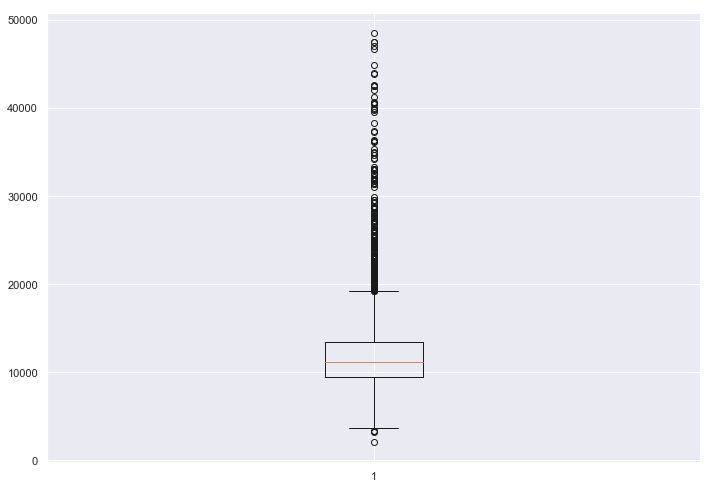

In [266]:
fig, ax = plt.subplots()

# Plot a bar-chart of gold medals as a function of country
ax.boxplot(df['cena_metr_kw'])

# Set the x-axis tick labels to the country names
#ax.set_xticklabels(df.index, rotation=90)

# Set the y-axis label
#ax.set_ylabel('Number of medals')

plt.show()

In [267]:
df=df[(df['cena_metr_kw']<55000) & (df['cena_metr_kw']>4000)].copy()#usuwam skrajne wartosci gdy cena_mkw jest > niz 55000 i mniejsze niz 4000 za mkw

In [268]:
df[df['cena_metr_kw']<4000]

,numer_ogloszenia,tytul,cena,cena_za_metr,lokalizacja,atrybuty,wartosci,opis,pietro,powierzchnia,pokoje,oplaty,pietra_w_bud,typ_zab,rok_budowy,material,cena_metr_kw


{'whiskers': [<matplotlib.lines.Line2D at 0x17b001aa0f0>,
 'caps': [<matplotlib.lines.Line2D at 0x17b001aab00>,
 'boxes': [<matplotlib.lines.Line2D at 0x17b001b2f28>],
 'medians': [<matplotlib.lines.Line2D at 0x17b001c8470>],
 'fliers': [<matplotlib.lines.Line2D at 0x17b001c8908>],
 'means': []}

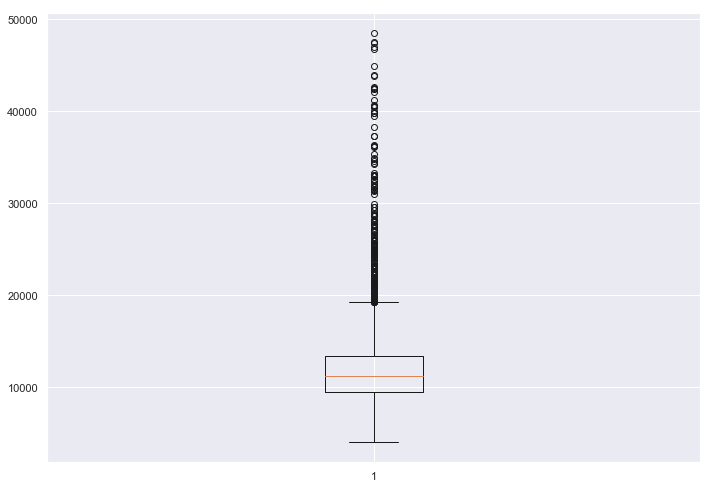

In [269]:
fig, ax = plt.subplots()

# Plot a bar-chart of gold medals as a function of country
ax.boxplot(df['cena_metr_kw'])

# Set the x-axis tick labels to the country names
#ax.set_xticklabels(df.index, rotation=90)

# Set the y-axis label
#ax.set_ylabel('Number of medals')

plt.show()

In [270]:
df.lokalizacja.explode()

0          Warszawa
0           Mokotów
0       mazowieckie
1          Warszawa
1           Mokotów
           ...     
8644         Zawady
8644    mazowieckie
8645       Warszawa
8645      Białołęka
8645    mazowieckie
Name: lokalizacja, Length: 25619, dtype: object

In [271]:
df['cena_metr_kw'].mean()

11914.483904585457

In [272]:
df['cena_metr_kw'].min()

4045

In [273]:
df['cena_metr_kw'].max()

48501

In [274]:
df['cena_metr_kw'].median()

11190.0

In [275]:
test=unnesting(df, ['lokalizacja'], axis=0)

In [276]:
test

,lokalizacja0,lokalizacja1,lokalizacja2,numer_ogloszenia,tytul,cena,cena_za_metr,atrybuty,wartosci,opis,pietro,powierzchnia,pokoje,oplaty,pietra_w_bud,typ_zab,rok_budowy,material,cena_metr_kw
0,Warszawa,Mokotów,mazowieckie,18538799,"44,18m2 | Kamienica | Stary Mokotów | Metro |",624 000,"14 124,04 zł/m","[Powierzchnia w m2, Liczba pokoi, Piętro, Forma własności, Stan, Rok budowy, Typ zabudowy, Materiał budynku, Liczba pięter w budynku, Numer referencyjny]","[44,18 m, 2, 1, własność, wysoki standard, 1949, kamienica, cegła, 3, gratka-322/9140/OMS]","Powierzchnia w m2 44,18 m Liczba pokoi 2 Piętro 1 Forma własności własność Stan wysoki standard Rok budowy 1949 Typ zabudowy kamienica Materiał budynku cegła Liczba pięter w budynku 3 Numer referencyjny gratka-322/9140/OMS",1,44,2,NaN,3,kamienica,1949,cegła,14124
1,Warszawa,Mokotów,mazowieckie,18483261,"Stary Mokotów - 4 pokojowe, 62 m2",690 000,"11 184,96 zł/m","[Powierzchnia w m2, Liczba pokoi, Piętro, Forma własności, Stan, Rok budowy, Materiał budynku, Liczba pięter w budynku, Czy mieszkanie ma łazienkę?, Numer referencyjny]","[61,69 m, 4, 1, własność, do remontu, 1975, rama H, 4, tak, gratka-3756/4790/OMS]","Powierzchnia w m2 61,69 m Liczba pokoi 4 Piętro 1 Forma własności własność Stan do remontu Rok budowy 1975 Materiał budynku rama H Liczba pięter w budynku 4 Czy mieszkanie ma łazienkę? tak Numer referencyjny gratka-3756/4790/OMS",1,61,4,NaN,4,NaN,1975,rama,11184
2,Warszawa,Mokotów,mazowieckie,18508193,"Mieszkanie, sprzedaż, 38.00, Warszawa, Mokotów, Służew",539 000,"14 184,21 zł/m","[Powierzchnia w m2, Liczba pokoi, Piętro, Forma własności, Rok budowy, Typ zabudowy, Materiał budynku, Liczba pięter w budynku, Miejsce parkingowe, Liczba miejsc parkingowych, Forma kuchni, Czy mieszkanie ma łazienkę?, Numer referencyjny, Forma / wyposażenie łazienki]","[38 m, 2, 2, własność, 2017, apartamentowiec, cegła, 5, w garażu, 1, w aneksie, tak, gratka-203, osobne WC]",Powierzchnia w m2 38 m Liczba pokoi 2 Piętro 2 Forma własności własność Rok budowy 2017 Typ zabudowy apartamentowiec Materiał budynku cegła Liczba pięter w budynku 5 Miejsce parkingowe w garażu Liczba miejsc parkingowych 1 Forma kuchni w aneksie Czy mieszkanie ma łazienkę? tak Numer referencyjny gratka-203 Forma / wyposażenie łazienki osobne WC,2,38,2,NaN,5,apartamentowiec,2017,cegła,14184
3,Warszawa,Praga-Południe,mazowieckie,18498341,Mieszkanie z genialnym widokiem na zieleń.,462 000,"12 833,33 zł/m","[Powierzchnia w m2, Liczba pokoi, Piętro, Forma własności, Stan, Rok budowy, Typ zabudowy, Materiał budynku, Liczba pięter w budynku, Liczba miejsc parkingowych, Czy mieszkanie ma łazienkę?, Numer referencyjny]","[36 m, 1, 3, własność, wysoki standard, 2020, apartamentowiec, cegła, 4, 1, tak, gratka-96/7447/OMS]",Powierzchnia w m2 36 m Liczba pokoi 1 Piętro 3 Forma własności własność Stan wysoki standard Rok budowy 2020 Typ zabudowy apartamentowiec Materiał budynku cegła Liczba pięter w budynku 4 Liczba miejsc parkingowych 1 Czy mieszkanie ma łazienkę? tak Numer referencyjny gratka-96/7447/OMS,3,36,1,NaN,4,apartamentowiec,2020,cegła,12833
4,Warszawa,Ursynów,mazowieckie,18547787,Trzypokojowe mieszkanie z ogrodami na dachu,899 000,"10 215,91 zł/m","[Powierzchnia w m2, Liczba pokoi, Piętro, Forma własności, Rok budowy, Typ zabudowy, Materiał budynku, Liczba pięter w budynku, Miejsce parkingowe, Czy mieszkanie ma łazienkę?, Numer referencyjny]","[88 m, 3, 5, własność, 2002, blok, cegła, 5, w garażu, tak, gratka-21C8C62F]",Powierzchnia w m2 88 m Liczba pokoi 3 Piętro 5 Forma własności własność Rok budowy 2002 Typ zabudowy blok Materiał budynku cegła Liczba pięter w budynku 5 Miejsce parkingowe w garażu Czy mieszkanie ma łazienkę? tak Numer referencyjny gratka-21C8C62F,5,88,3,NaN,5,blok,2002,cegła,10215
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8641,Warszawa,Skorosze,mazowieckie,18320317,"Nowe mieszkanie Warszawa Ursus, Skorosze",535 367,"9 592,67 zł/m","[Powierzchnia w m2, Liczba pokoi, Pięt

In [277]:
test.groupby('lokalizacja1').count()

,lokalizacja0,lokalizacja2,numer_ogloszenia,tytul,cena,cena_za_metr,atrybuty,wartosci,opis,pietro,powierzchnia,pokoje,oplaty,pietra_w_bud,typ_zab,rok_budowy,material,cena_metr_kw
lokalizacja1,,,,,,,,,,,,,,,,,,
Anin,1,1,1,1,1,1,1,1,1,1,1,1,0,1,1,1,0,1
Augustów,1,1,1,1,1,1,1,1,1,1,1,1,0,1,1,0,1,1
Bemowo,449,449,449,449,449,449,449,449,449,363,449,448,67,434,392,376,213,449
Białołęka,609,609,609,609,609,609,609,609,609,494,609,609,42,593,538,378,197,609
Bielany,346,346,346,346,346,346,346,346,346,315,346,345,46,341,282,315,181,346
Bródno,29,29,29,29,29,29,29,29,29,25,29,29,14,29,27,26,23,29
Chomiczówka,3,3,3,3,3,3,3,3,3,2,3,3,1,3,3,3,3,3
Chrzanów,3,3,3,3,3,3,3,3,3,1,3,3,0,3,3,3,0,3
Cytadela,2,2,2,2,2,2,2,2,2,2,2,2,1,2,2,1,0,2


In [278]:
test.lokalizacja1.unique()

array(['Mokotów', 'Praga-Południe', 'Ursynów', 'Śródmieście', 'Wola',
       'Praga-Północ', 'Bielany', 'mazowieckie', 'Targówek', 'Ochota',
       'Białołęka', 'Bemowo', 'Włochy', 'Ursus', 'Żoliborz', 'Rembertów',
       'Wilanów', 'Wawer', 'Dolny Mokotów', 'Bródno', 'Tarchomin',
       'Wesoła', 'Służewiec', 'Górny Mokotów', 'Muranów', 'Powiśle',
       'Imielin', 'Saska Kępa', 'Czyste', 'Gocław', 'Ulrychów', 'Anin',
       'Służew', 'Natolin', 'Grochów', 'Jelonki', 'Olszynka Grochowska',
       'Chomiczówka', 'Stare Miasto', 'Sadyba', 'Stegny', 'Powązki',
       'Młociny', 'Stara Miłosna', 'Odolany', 'Kabaty', 'Młynów',
       'Zacisze', 'Skorosze', 'Piaski', 'Zawady', 'Szmulki', 'Miedzeszyn',
       'Słodowiec', 'Rakowiec', 'Królikarnia', 'Kamionek', 'Nowe Górce',
       'Żerań', 'Międzylesie', 'Nowe Miasto', 'Szczęśliwice', 'Nowodwory',
       'Groty', 'Wyczółki', 'Górce', 'Wawrzyszew', 'Ksawerów', 'Cytadela',
       'Gocławek', 'Falenica', 'Lewandów', 'Sielce', 'Raków', 'Pyry',
 

In [279]:
test.lokalizacja0.unique()

array(['Warszawa'], dtype=object)

In [280]:
test.lokalizacja2.unique()

array(['mazowieckie', None], dtype=object)

In [281]:
df.pokoje.value_counts()

 3    3089
 2    3076
 4    1195
 1     846
 5     307
 6      75
 7      23
Name: pokoje, dtype: int64

In [282]:
cena_calosc=[]
for words in df['cena']:
    cena_calosc.append(re.sub(r"\s",'',  words))

In [283]:
#robie przykładowo jak to zmienic

In [284]:
df.cena=cena_calosc

In [285]:
df.cena.replace('\D\d+','',regex=True,inplace=True)

In [286]:
df.cena=df.cena.astype(int)

In [287]:
#cena_za_metr     zmienic na float, stadardowo jest na int, bo zrobilem funkcje podlogi, ale to do przemyslenia.
#                    NA TEN MOMENT ZOSTAJE i korzystam ze zmiennej cena_metr_kw      
#powierzchnia      zmienic na float
#pokoje            RACZEJ zostawic - zmienie bo nie moge robic relacji pomiedzy nimi
#oplaty             zmienic na float
#

In [288]:
df.pokoje.replace(np.NaN,0,inplace=True)

In [289]:
df[df['pokoje'].isnull()]

,numer_ogloszenia,tytul,cena,cena_za_metr,lokalizacja,atrybuty,wartosci,opis,pietro,powierzchnia,pokoje,oplaty,pietra_w_bud,typ_zab,rok_budowy,material,cena_metr_kw


In [290]:
df.pokoje=df.pokoje.astype(int)

In [291]:
#powierzchnia

df.powierzchnia=df.powierzchnia.astype(int)

In [292]:
df[df.pokoje>5]

,numer_ogloszenia,tytul,cena,cena_za_metr,lokalizacja,atrybuty,wartosci,opis,pietro,powierzchnia,pokoje,oplaty,pietra_w_bud,typ_zab,rok_budowy,material,cena_metr_kw
15,18599419,Okazja cenowa - Penthouse do remontu ENG,2699000,"10 783,06 zł/m","[Warszawa, Wola, mazowieckie]","[Powierzchnia w m2, Liczba pokoi, Piętro, Forma własności, Stan, Rok budowy, Typ zabudowy, Liczba pięter w budynku, Liczba miejsc parkingowych, Czy mieszkanie ma łazienkę?, Numer referencyjny]","[250,30 m, 6, 13, spółdzielcze własnościowe z KW, do remontu, 1998, apartamentowiec, 13, 1, tak, gratka-74/10573/OMS]","Powierzchnia w m2 250,30 m Liczba pokoi 6 Piętro 13 Forma własności spółdzielcze własnościowe z KW Stan do remontu Rok budowy 1998 Typ zabudowy apartamentowiec Liczba pięter w budynku 13 Liczba miejsc parkingowych 1 Czy mieszkanie ma łazienkę? tak Numer referencyjny gratka-74/10573/OMS",1,250,6,NaN,13,apartamentowiec,1998,NaN,10783
60,18431417,"Apartament/dom, ogródek o pow. 153 m2",1690000,"11 437,47 zł/m","[Warszawa, Włochy, mazowieckie]","[Powierzchnia w m2, Liczba pokoi, Piętro, Forma własności, Rok budowy, Materiał budynku, Liczba pięter w budynku, Liczba miejsc parkingowych, Forma kuchni, Czy mieszkanie ma łazienkę?, Numer referencyjny]","[147,76 m, 6, parter, własność, 2020, cegła, 3, 1, oddzielna, tak, gratka-169/783/OMS]","Powierzchnia w m2 147,76 m Liczba pokoi 6 Piętro parter Forma własności własność Rok budowy 2020 Materiał budynku cegła Liczba pięter w budynku 3 Liczba miejsc parkingowych 1 Forma kuchni oddzielna Czy mieszkanie ma łazienkę? tak Numer referencyjny gratka-169/783/OMS",NaN,147,6,NaN,3,NaN,2020,cegła,11437
98,18518859,"6 pokoi,160 m2, 2 poziomy,4 piętro, 1995r. Ursynów",1200000,7 500 zł/m,"[Warszawa, Ursynów, mazowieckie]","[Powierzchnia w m2, Liczba pokoi, Piętro, Forma własności, Stan, Rok budowy, Typ zabudowy, Liczba pięter w budynku, Czy mieszkanie ma łazienkę?, Numer referencyjny]","[160 m, 6, 4, własność, do odświeżenia, 1995, blok, 4, tak, gratka-10580/4595/OMS]",Powierzchnia w m2 160 m Liczba pokoi 6 Piętro 4 Forma własności własność Stan do odświeżenia Rok budowy 1995 Typ zabudowy blok Liczba pięter w budynku 4 Czy mieszkanie ma łazienkę? tak Numer referencyjny gratka-10580/4595/OMS,4,160,6,NaN,4,blok,1995,NaN,7500
143,18481503,"Duży, przestronny apartament z tarasem na dachu",2789000,"15 324,18 zł/m","[Warszawa, Mokotów, mazowieckie]","[Powierzchnia w m2, Liczba pokoi, Piętro, Forma własności, Rok budowy, Typ zabudowy, Liczba pięter w budynku, Liczba miejsc parkingowych, Czy mieszkanie ma łazienkę?, Numer referencyjny]","[182 m, 6, 5, własność, 2018, apartamentowiec, 6, 1, tak, gratka-18853/2089/OMS]",Powierzchnia w m2 182 m Liczba pokoi 6 Piętro 5 Forma własności własność Rok budowy 2018 Typ zabudowy apartamentowiec Liczba pięter w budynku 6 Liczba miejsc parkingowych 1 Czy mieszkanie ma łazienkę? tak Numer referencyjny gratka-18853/2089/OMS,5,182,6,NaN,6,apartamentowiec,2018,NaN,15324
232,13308539,"Mieszkanie Warszawa Bemowo, ul. Widawska",1160000,"9 871,50 zł/m","[Warszawa, Bemowo, mazowieckie]","[Powierzchnia w m2, Liczba pokoi, Piętro, Forma własności, Stan, Rok budowy, Typ zabudowy, Materiał budynku, Liczba pięter w budynku, Miejsce parkingowe, Forma kuchni, Numer referencyjny]","[117,51 m, 6, 3, spółdzielcze własnościowe, do remontu, 1998, blok, cegła, 4, w garażu, oddzielna, gratka-15824/3685/OMS]","Powierzchnia w m2 117,51 m Liczba pokoi 6 Piętro 3 Forma własności spółdzielcze własnościowe Stan do remontu Rok budowy 1998 Typ zabudowy blok Materiał budynku cegła Liczba pięter w budynku 4 Miejsce parkingowe w garażu Forma kuchni oddzielna Numer referencyjny gratka-15824/3685/OMS",3,117,6,NaN,4,blok,1998,cegła,9871
240,18540107,"KABATY - 145M2, 6 POKOI, JASNE, IDEALNIE CICHE",1770000,"12 206,90 zł/m","[Warszawa, Ursynów, mazowieckie]","[Powierzchnia w m2, Liczba pokoi, Piętro, Forma własności, Stan, Rok budowy, Typ zabudowy, Materiał budynku, Liczba pięter w budynku, Liczba miejsc parkingowych, Numer refer

In [293]:
test[test.lokalizacja1=='mazowieckie']#to mozemy wywalic gdy zachodzi taki warunek, bo tak naprawde to dla celow statytycznych tylko

,lokalizacja0,lokalizacja1,lokalizacja2,numer_ogloszenia,tytul,cena,cena_za_metr,atrybuty,wartosci,opis,pietro,powierzchnia,pokoje,oplaty,pietra_w_bud,typ_zab,rok_budowy,material,cena_metr_kw
17,Warszawa,mazowieckie,None,18457495,Powiśle Gornośląska 3 pokoje Idealne!,619 000,"13 311,83 zł/m","[Powierzchnia w m2, Liczba pokoi, Piętro, Forma własności, Stan, Rok budowy, Typ zabudowy, Materiał budynku, Liczba pięter w budynku, Forma kuchni, Czy mieszkanie ma łazienkę?, Numer referencyjny]","[46,50 m, 3, 2, spółdzielcze własnościowe z KW, wysoki standard, 1980, blok, rama H, 10, w aneksie, tak, gratka-86/8962/OMS]","Powierzchnia w m2 46,50 m Liczba pokoi 3 Piętro 2 Forma własności spółdzielcze własnościowe z KW Stan wysoki standard Rok budowy 1980 Typ zabudowy blok Materiał budynku rama H Liczba pięter w budynku 10 Forma kuchni w aneksie Czy mieszkanie ma łazienkę? tak Numer referencyjny gratka-86/8962/OMS",2,46,3,NaN,10,blok,1980,rama,13311
23,Warszawa,mazowieckie,None,18431509,Gotowa inwestycja -mieszkanie 2 pokojowe,439 846,"10 475,02 zł/m","[Powierzchnia w m2, Liczba pokoi, Piętro, Forma własności, Rok budowy, Typ zabudowy, Materiał budynku, Liczba pięter w budynku, Liczba miejsc parkingowych, Forma kuchni, Czy mieszkanie ma łazienkę?, Numer referencyjny]","[41,99 m, 2, 1, własność, 2020, blok, pustak, 7, 1, w aneksie, tak, gratka-316/5075/OMS]","Powierzchnia w m2 41,99 m Liczba pokoi 2 Piętro 1 Forma własności własność Rok budowy 2020 Typ zabudowy blok Materiał budynku pustak Liczba pięter w budynku 7 Liczba miejsc parkingowych 1 Forma kuchni w aneksie Czy mieszkanie ma łazienkę? tak Numer referencyjny gratka-316/5075/OMS",1,41,2,NaN,7,blok,2020,pustak,10475
85,Warszawa,mazowieckie,None,18457239,"2 pokoje, Klimczaka 44m2, swietna lokalizacja",550 000,12 500 zł/m,"[Powierzchnia w m2, Liczba pokoi, Piętro, Forma własności, Rok budowy, Typ zabudowy, Liczba pięter w budynku, Liczba miejsc parkingowych, Forma kuchni, Czy mieszkanie ma łazienkę?, Numer referencyjny]","[44 m, 2, 3, własność, 2019, apartamentowiec, 4, 1, w aneksie, tak, gratka-58/8962/OMS]",Powierzchnia w m2 44 m Liczba pokoi 2 Piętro 3 Forma własności własność Rok budowy 2019 Typ zabudowy apartamentowiec Liczba pięter w budynku 4 Liczba miejsc parkingowych 1 Forma kuchni w aneksie Czy mieszkanie ma łazienkę? tak Numer referencyjny gratka-58/8962/OMS,3,44,2,NaN,4,apartamentowiec,2019,NaN,12500
135,Warszawa,mazowieckie,None,18457273,Apartament - 5 pokoi -134m2 Sarmacka,1 447 000,"10 798,51 zł/m","[Powierzchnia w m2, Liczba pokoi, Piętro, Forma własności, Stan, Typ zabudowy, Liczba pięter w budynku, Liczba miejsc parkingowych, Forma kuchni, Numer referencyjny]","[134 m, 4, 1, własność, wysoki standard, apartamentowiec, 4, 1, w aneksie, gratka-67/8962/OMS]",Powierzchnia w m2 134 m Liczba pokoi 4 Piętro 1 Forma własności własność Stan wysoki standard Typ zabudowy apartamentowiec Liczba pięter w budynku 4 Liczba miejsc parkingowych 1 Forma kuchni w aneksie Numer referencyjny gratka-67/8962/OMS,1,134,4,NaN,4,apartamentowiec,NaN,NaN,10798
158,Warszawa,mazowieckie,None,18497757,"Bardzo dobra lokalizacja, nowa inwestycja!!!!!!!!!",306 583,"10 776,20 zł/m","[Powierzchnia w m2, Liczba pokoi, Piętro, Forma własności, Rok budowy, Typ zabudowy, Liczba pięter w budynku, Forma kuchni, Czy mieszkanie ma łazienkę?, Numer referencyjny, Forma / wyposażenie łazienki]","[28,45 m, 1, parter, własność, 2021, apartamentowiec, 4, w aneksie, tak, gratka-1.A.0.13, osobne WC]","Powierzchnia w m2 28,45 m Liczba pokoi 1 Piętro parter Forma własności własność Rok budowy 2021 Typ zabudowy apartamentowiec Liczba pięter w budynku 4 Forma kuchni w aneksie Czy mieszkanie ma łazienkę? tak Numer referencyjny gratka-1.A.0.13 Forma / wyposażenie łazienki osobne WC",NaN,28,1,NaN,4,apartamentowiec,2021,NaN,10776
277,Warszawa,mazowieckie,None,18431501,2 pokoje w nowej inwestycji - II kwartał 2020,427 060,9 748 zł/m,"[Powierzchnia w m2, Liczba pokoi, Piętro, Forma własności, Rok budowy, Typ zabudowy, Materiał b

In [294]:
df['dzielnica']=test.iloc[:,1]

# WIZUALIZACJA

(array([5.224e+03, 2.625e+03, 5.730e+02, 1.580e+02, 3.500e+01, 1.100e+01,
        3.000e+00, 5.000e+00, 0.000e+00, 2.000e+00]),
 array([ 14. ,  62.6, 111.2, 159.8, 208.4, 257. , 305.6, 354.2, 402.8,
        451.4, 500. ]),
 <a list of 10 Patch objects>)

Text(0.5,0,'powierzchnia')

Text(0,0.5,'Liczba mieszkan')

Text(0.5,1,'Histogram powierzchnia')

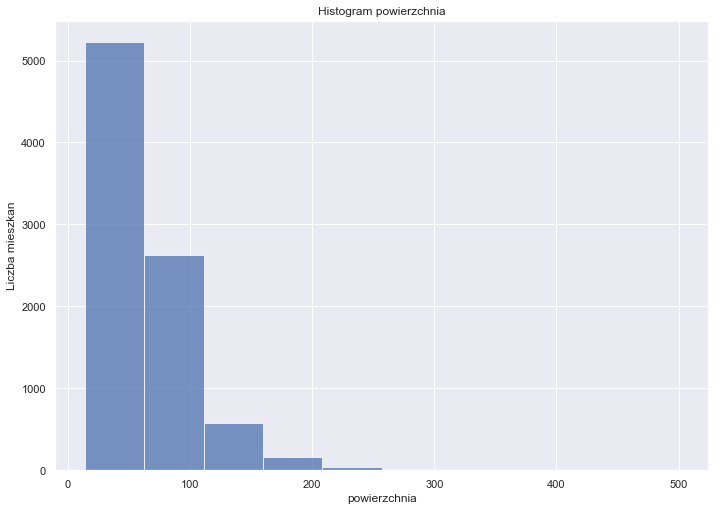

In [295]:
fig, ax = plt.subplots()

# Plot a bar-chart of gold medals as a function of country
ax.hist(df['powierzchnia'],facecolor='b', alpha=0.75)



plt.xlabel('powierzchnia')
plt.ylabel('Liczba mieszkan')
plt.title('Histogram powierzchnia')
# Set the x-axis tick labels to the country names
#ax.set_xticklabels(df.index, rotation=90)

# Set the y-axis label
#ax.set_ylabel('Number of medals')

plt.show()

(array([1058., 5101., 1871.,  429.,   88.,   31.,   28.,    9.,   15.,
           6.]),
 array([ 4045. ,  8490.6, 12936.2, 17381.8, 21827.4, 26273. , 30718.6,
        35164.2, 39609.8, 44055.4, 48501. ]),
 <a list of 10 Patch objects>)

Text(0.5,0,'cena/mkw')

Text(0,0.5,'Liczba mieszkan')

Text(0.5,1,'Histogram cena/mkw')

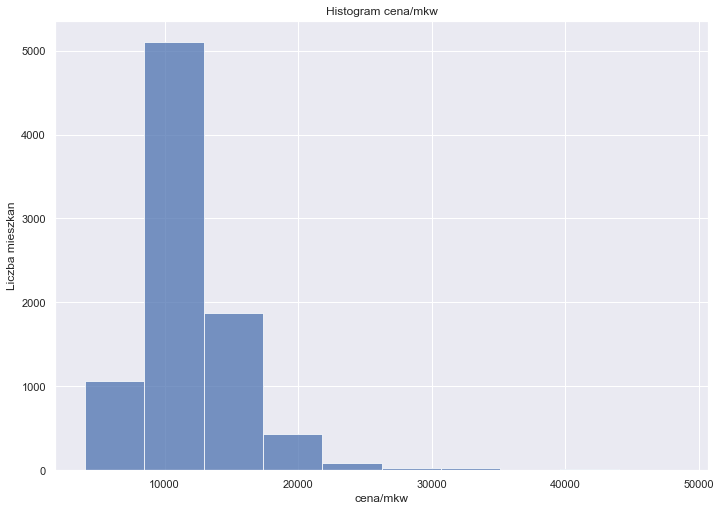

In [296]:
fig, ax = plt.subplots()

# Plot a bar-chart of gold medals as a function of country
ax.hist(df['cena_metr_kw'],facecolor='b', alpha=0.75)



plt.xlabel('cena/mkw')
plt.ylabel('Liczba mieszkan')
plt.title('Histogram cena/mkw')
# Set the x-axis tick labels to the country names
#ax.set_xticklabels(df.index, rotation=90)

# Set the y-axis label
#ax.set_ylabel('Number of medals')

plt.show()

(array([7.992e+03, 5.080e+02, 8.300e+01, 2.400e+01, 1.900e+01, 5.000e+00,
        3.000e+00, 0.000e+00, 0.000e+00, 2.000e+00]),
 array([  153000.,  1543940.,  2934880.,  4325820.,  5716760.,  7107700.,
         8498640.,  9889580., 11280520., 12671460., 14062400.]),
 <a list of 10 Patch objects>)

Text(0.5,0,'cena')

Text(0,0.5,'Liczba mieszkan')

Text(0.5,1,'Histogram cena')

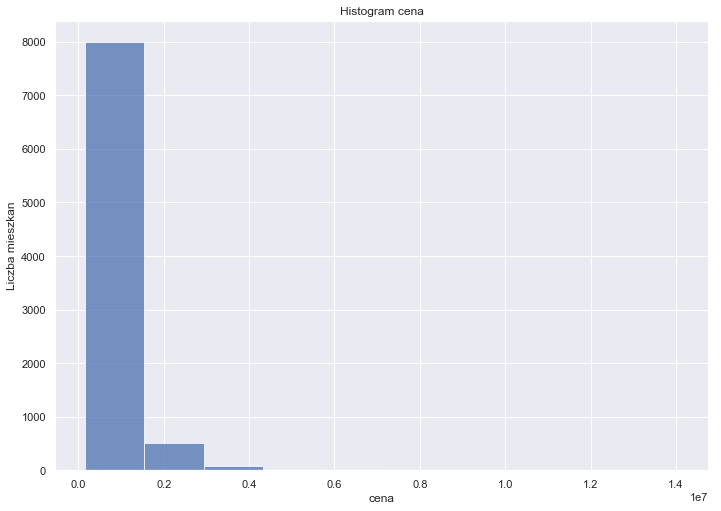

In [297]:
fig, ax = plt.subplots()

# Plot a bar-chart of gold medals as a function of country
ax.hist(df['cena'],facecolor='b', alpha=0.75)



plt.xlabel('cena')
plt.ylabel('Liczba mieszkan')
plt.title('Histogram cena')
# Set the x-axis tick labels to the country names
#ax.set_xticklabels(df.index, rotation=90)

# Set the y-axis label
#ax.set_ylabel('Number of medals')

plt.show()

(array([  25.,  846., 3076.,    0., 3089., 1195.,    0.,  307.,   75.,
          23.]),
 array([0. , 0.7, 1.4, 2.1, 2.8, 3.5, 4.2, 4.9, 5.6, 6.3, 7. ]),
 <a list of 10 Patch objects>)

Text(0.5,0,'pokoje')

Text(0,0.5,'Liczba mieszkan')

Text(0.5,1,'Histogram pokoje')

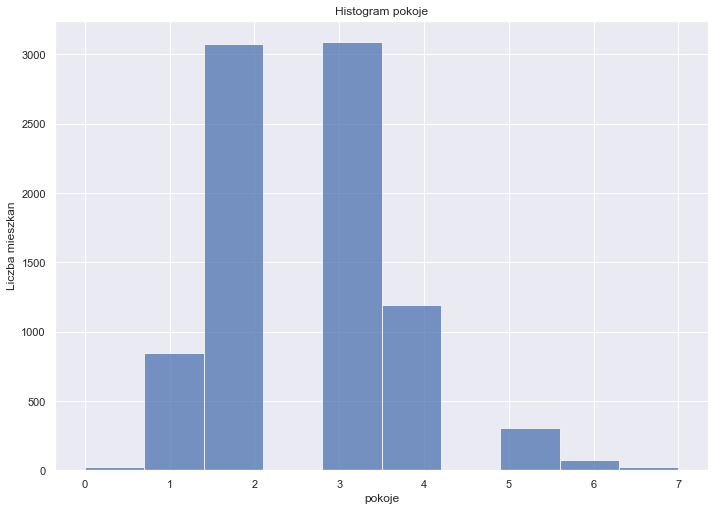

In [298]:
fig, ax = plt.subplots()

# Plot a bar-chart of gold medals as a function of country
ax.hist(df['pokoje'],facecolor='b', alpha=0.75)



plt.xlabel('pokoje')
plt.ylabel('Liczba mieszkan')
plt.title('Histogram pokoje')
# Set the x-axis tick labels to the country names
#ax.set_xticklabels(df.index, rotation=90)

# Set the y-axis label
#ax.set_ylabel('Number of medals')

plt.show()

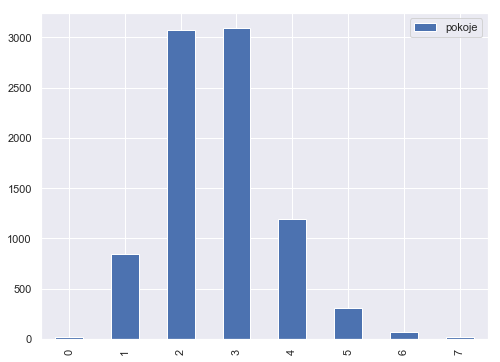

In [299]:
#wykres do tego fajnie by zrobic
df['pokoje'].value_counts().sort_index().plot.bar(figsize=(8, 6),legend=True)


In [300]:
# fig, ax = plt.subplots()

# # Plot a bar-chart of gold medals as a function of country
# ax.scatter(df['pokoje'],df.powierzchnia)



# plt.xlabel('pokoje')
# plt.ylabel('cena')
# plt.title('pokoje/cena')
# # Set the x-axis tick labels to the country names
# #ax.set_xticklabels(df.index, rotation=90)

# # Set the y-axis label
# #ax.set_ylabel('Number of medals')

# plt.show()

In [301]:
# fig, ax = plt.subplots()

# # Plot a bar-chart of gold medals as a function of country
# ax.scatter(df['cena_metr_kw'],df['pokoje'])



# plt.xlabel('pokoje')
# plt.ylabel('cena')
# plt.title('pokoje/cena')
# # Set the x-axis tick labels to the country names
# #ax.set_xticklabels(df.index, rotation=90)

# # Set the y-axis label
# #ax.set_ylabel('Number of medals')

# plt.show()

In [302]:
import seaborn as sns


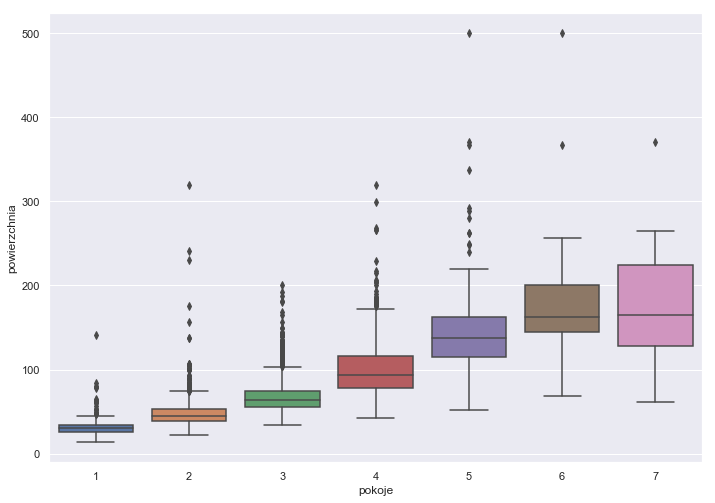

In [303]:
sns.boxplot(x="pokoje", y="powierzchnia", data=df[df.pokoje>0])

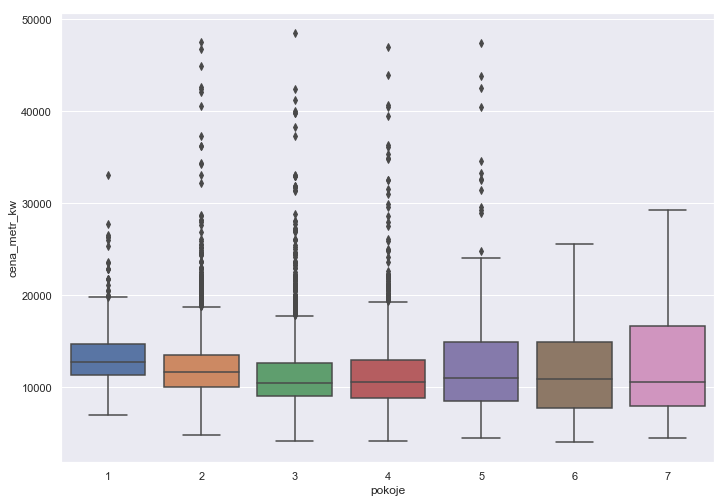

In [304]:
sns.boxplot(x="pokoje", y="cena_metr_kw", data=df[df.pokoje>0])

In [305]:
#widac, ze wraz ze wzrostem liczby pokoi średnia cena za mkw spada

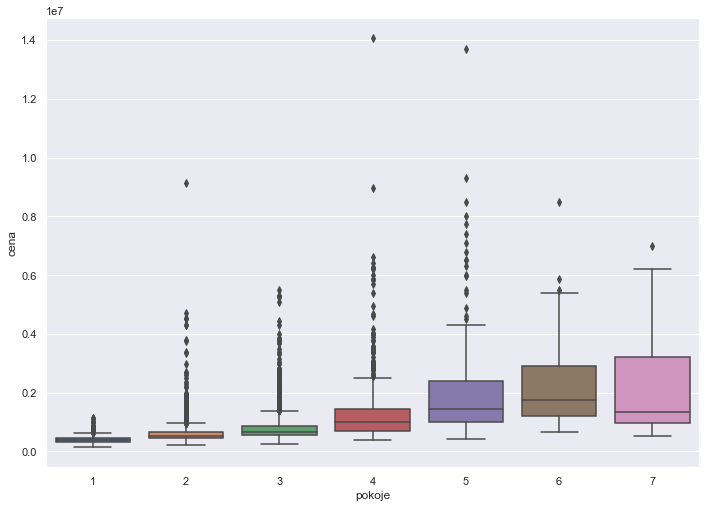

In [306]:
sns.boxplot(x="pokoje", y="cena", data=df[df.pokoje>0])

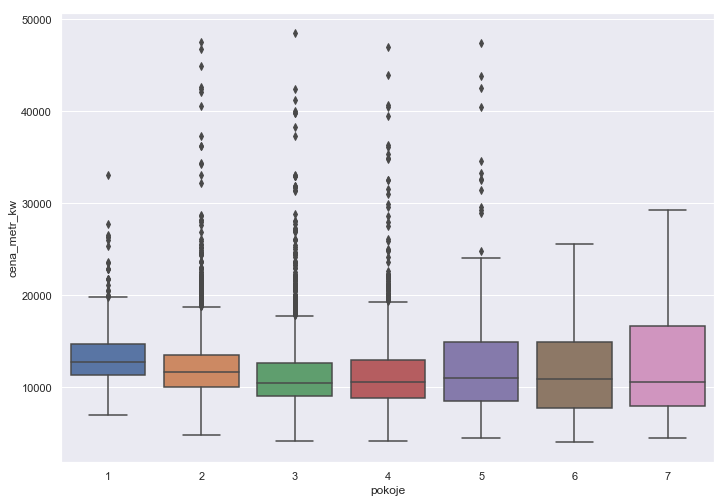

In [307]:
sns.boxplot(x="pokoje", y="cena_metr_kw", data=df[df.pokoje>0])

### cena przy wiekszej liczbie pokoi rosnie, ale cena za metr kwadratowy przy wiekszej liczbie pokoi juz niekoniecznie

In [308]:
#df.groupby('lokalizacja').mean()
round(df.groupby('dzielnica')[['cena','cena_metr_kw']].median().sort_values(by='cena_metr_kw',ascending=False).reset_index(),2)

,dzielnica,cena,cena_metr_kw
0,Stare Miasto,1275000.0,19619.0
1,Czyste,629720.0,18200.0
2,Powązki,667000.0,16512.0
3,Muranów,1277000.0,16211.5
4,Nowe Miasto,548500.0,15633.5
5,Śródmieście,870000.0,15511.0
6,Powiśle,768500.0,14741.5
7,Wierzbno,842500.0,14056.5
8,Słodowiec,1850000.0,14015.0
9,Cytadela,452000.0,13877.5


In [309]:
#df.groupby('lokalizacja').mean()
round(df.groupby('dzielnica')[['cena','cena_metr_kw']].mean().sort_values(by='cena_metr_kw',ascending=False),2)

,cena,cena_metr_kw
dzielnica,,
Stare Miasto,1371363.64,18584.45
Śródmieście,1305386.16,17129.92
Czyste,698444.00,16879.20
Muranów,1277000.00,16211.50
Powiśle,1259565.74,16002.65
Powązki,908250.00,15935.75
Nowe Miasto,548500.00,15633.50
Wierzbno,842500.00,14056.50
Słodowiec,1850000.00,14015.00


In [310]:
df.groupby('dzielnica')[['cena','cena_metr_kw']].median()

,cena,cena_metr_kw
dzielnica,,
Anin,1290000.0,7588.0
Augustów,380819.0,6591.0
Bemowo,593500.0,9918.0
Białołęka,437805.0,8043.0
Bielany,549000.0,10483.5
Bródno,439000.0,9447.0
Chomiczówka,539000.0,9625.0
Chrzanów,810000.0,11982.0
Cytadela,452000.0,13877.5


Text(0.5,0,'pokoje')

Text(0,0.5,'cena')

Text(0.5,1,'pokoje/cena')

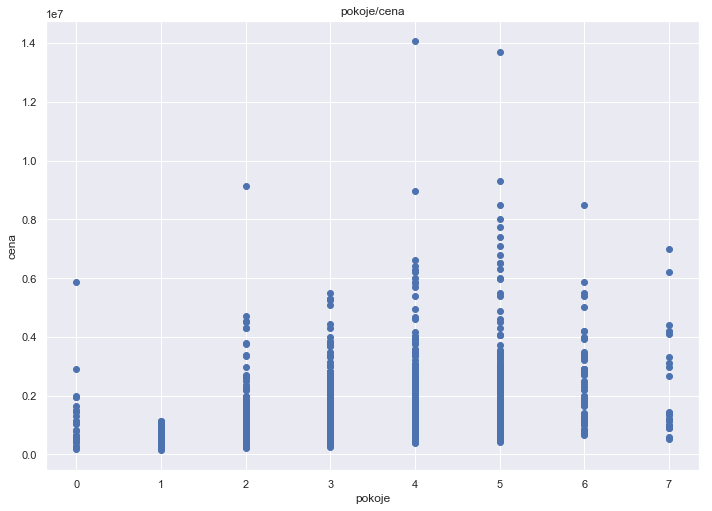

In [311]:
fig, ax = plt.subplots()

# Plot a bar-chart of gold medals as a function of country
ax.scatter(df['pokoje'],df['cena'])



plt.xlabel('pokoje')
plt.ylabel('cena')
plt.title('pokoje/cena')
# Set the x-axis tick labels to the country names
#ax.set_xticklabels(df.index, rotation=90)

# Set the y-axis label
#ax.set_ylabel('Number of medals')

plt.show()

In [312]:
pd.options.display.max_rows = 999

In [313]:
df.dzielnica.value_counts()

Mokotów                1314
Śródmieście            1015
Wola                    866
Praga-Południe          612
Białołęka               609
Ursynów                 471
Bemowo                  449
Ochota                  386
Wilanów                 350
Bielany                 346
Ursus                   304
Targówek                292
mazowieckie             289
Praga-Północ            247
Żoliborz                221
Włochy                  173
Wawer                   141
Rembertów                55
Gocław                   45
Powiśle                  34
Sadyba                   31
Wesoła                   31
Górny Mokotów            30
Bródno                   29
Grochów                  19
Saska Kępa               17
Kabaty                   15
Tarchomin                13
Służewiec                12
Gocławek                 12
Stegny                   12
Skorosze                 12
Stare Miasto             11
Zawady                   10
Dolny Mokotów            10
Młynów              

In [314]:
# mazowieckie damy, że to jest "INNE"

In [315]:
#Prawilna lista dzielnic https://pl.wikipedia.org/wiki/Podzia%C5%82_administracyjny_Warszawy
 
#     Bemowo
#     Białołęka
#     Bielany
#     Mokotów
#     Ochota
#     Praga Południe
#     Praga Północ
#     Rembertów
#     Śródmieście
#     Targówek
#     Ursus
#     Ursynów
#     Wawer
#     Wesoła
#     Wilanów
#     Włochy
#     Wola
#     Żoliborz


In [316]:
df.dzielnica.replace('WILANÓW','Wilanów',inplace=True)

### Przypisanie dzielnic 

In [317]:
# Źródłow https://pl.wikipedia.org/wiki/Mokot%C3%B3w i drugie jeszcze dodatam xD
df.dzielnica.replace(['Stary Mokotów','Sielce','Czerniaków','Siekierki','Augustówka','Sadyba','Stegny','Wierzbno','Ksawerów','Służew','Służewiec','Wyględów','Górny Mokotów','Dolny Mokotów','Królikarnia'],'Mokotów',inplace=True)

In [318]:
#https://pl.wikipedia.org/wiki/%C5%9Ar%C3%B3dmie%C5%9Bcie_(Warszawa)

In [319]:
df.dzielnica.replace(['Powiśle','Stare Miasto','Muranów','Centrum','Nowe Miasto','Mariensztat','Latawiec'],'Śródmieście',inplace=True)

In [320]:
#https://pl.wikipedia.org/wiki/Miejski_System_Informacji_(Warszawa)

In [321]:
df.dzielnica.replace(['Grochów','Gocław','Gocławek','Olszynka Grochowska','Saska Kępa','Kamionek'],'Praga-Południe',inplace=True)

In [322]:
df.dzielnica.replace(['Elsnerów','Bródno','Zacisze','Utrata'],'Targówek',inplace=True)

In [323]:
df.dzielnica.replace(['Młociny','Marymont','Słodowiec','Wawrzyszew','Wrzeciono','Chomiczówka','Piaski'],'Bielany',inplace=True)

In [324]:
df.dzielnica.replace(['Choszczówka','Grodzisk','Nowodwory','Tarchomin','Żerań','Białołęka Dworska','Lewandów','Dąbrówka Szlachecka','Augustów','Kępa Tarchomińska'],'Białołęka',inplace=True)

In [325]:
df.dzielnica.replace(['Chrzanów','Górce','Jelonki','Groty','Fort Bema','Nowe Górce','Karolin'],'Bemowo',inplace=True)

In [326]:
df.dzielnica.replace(['Czyste','Koło','Młynów','Mirów','Nowolipki','Odolany','Powązki','Ulrychów'],'Wola',inplace=True)

In [327]:
df.dzielnica.replace(['Filtry','Rakowiec','Szczęśliwice','Stara Ochota'],'Ochota',inplace=True)

In [328]:
df.dzielnica.replace(['Nowe Włochy','Okęcie','Paluch','Raków'],'Włochy',inplace=True)

In [329]:
df.dzielnica.replace(['Kabaty','Grabów','Natolin','Imielin','Wyczółki','Pyry'],'Ursynów',inplace=True)

In [330]:
df.dzielnica.replace(['Czechowice','Gołąbki','Niedźwiadek','Skorosze','Szamoty'],'Ursus',inplace=True)

In [331]:
df.dzielnica.replace(['Powsinek','Zawady','Kępa Zawadowska','Powsin'],'Wilanów',inplace=True)

In [332]:
df.dzielnica.replace(['Aleksandrów','Anin','Falenica','Las','Miedzeszyn','Międzylesie','Marysin Wawerski','Radość','Zerzeń','Zbytki','Borków','Sadul'],'Wawer',inplace=True)

In [333]:
df.dzielnica.replace(['Szmulki','Szmulowizna','Praga','Pelcowizna'],'Praga-Północ',inplace=True)

In [334]:
df.dzielnica.replace(['Nowy Rembertów','Stary Rembertów','Kawęczyn-Wygoda'],'Rembertów',inplace=True)

In [335]:
df.dzielnica.replace(['Stara Miłosna','Wola Grzybowska'],'Wesoła',inplace=True)

In [336]:
df.dzielnica.replace(['Cytadela'],'Żoliborz',inplace=True)

In [337]:
df.dzielnica.replace(['mazowieckie'],'brak informacji',inplace=True)

In [338]:
# df.dzielnica.value_counts()

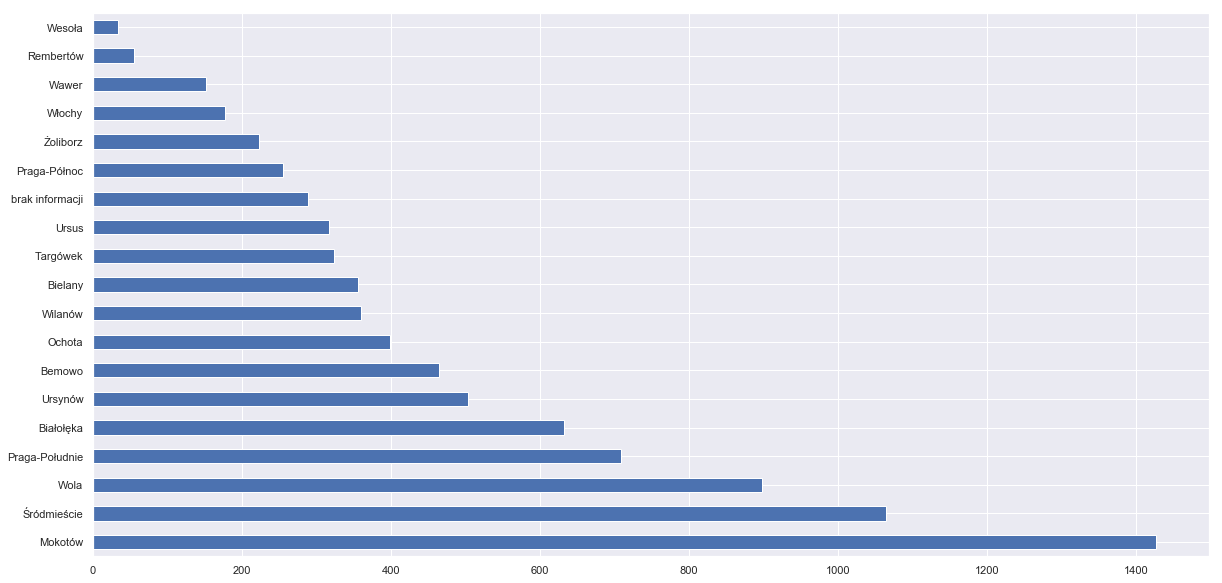

In [339]:
df['dzielnica'].value_counts().plot(kind='barh',figsize=(20,10))

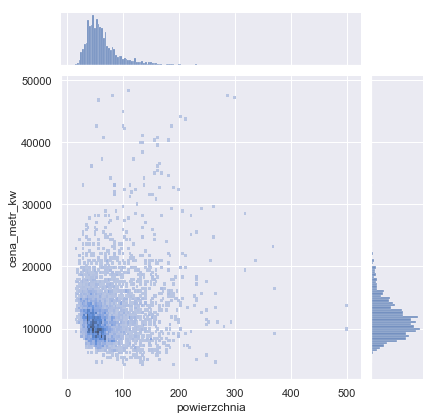

In [362]:
#To sie liczy kilkanasie minut i nic z tego nie ma
sns.jointplot(x="powierzchnia", y="cena_metr_kw", data=df[df.pokoje>0],kind="hist")


 


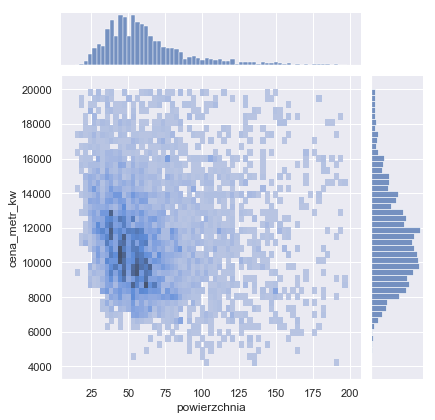

In [367]:
sns.jointplot(x="powierzchnia", y="cena_metr_kw", data=df[(df.pokoje>0)&(df.cena_metr_kw<20000)&(df.powierzchnia<200)],kind="hist")

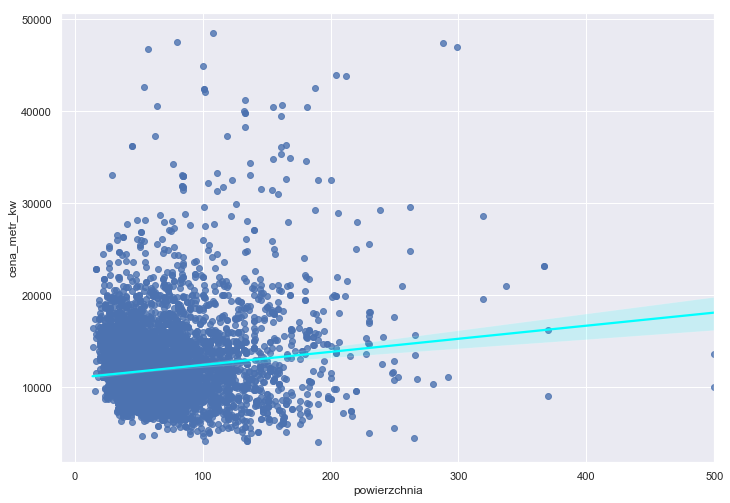

In [341]:
import pandas.util.testing as tm

# use the function regplot to make a scatterplot
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.regplot(x="powierzchnia", y="cena_metr_kw", data=df[df.pokoje>0],line_kws=({'color':'cyan'}))
#sns.plt.show()

In [342]:
df.cena_metr_kw.mean()

11914.483904585457

<Figure size 1440x864 with 0 Axes>

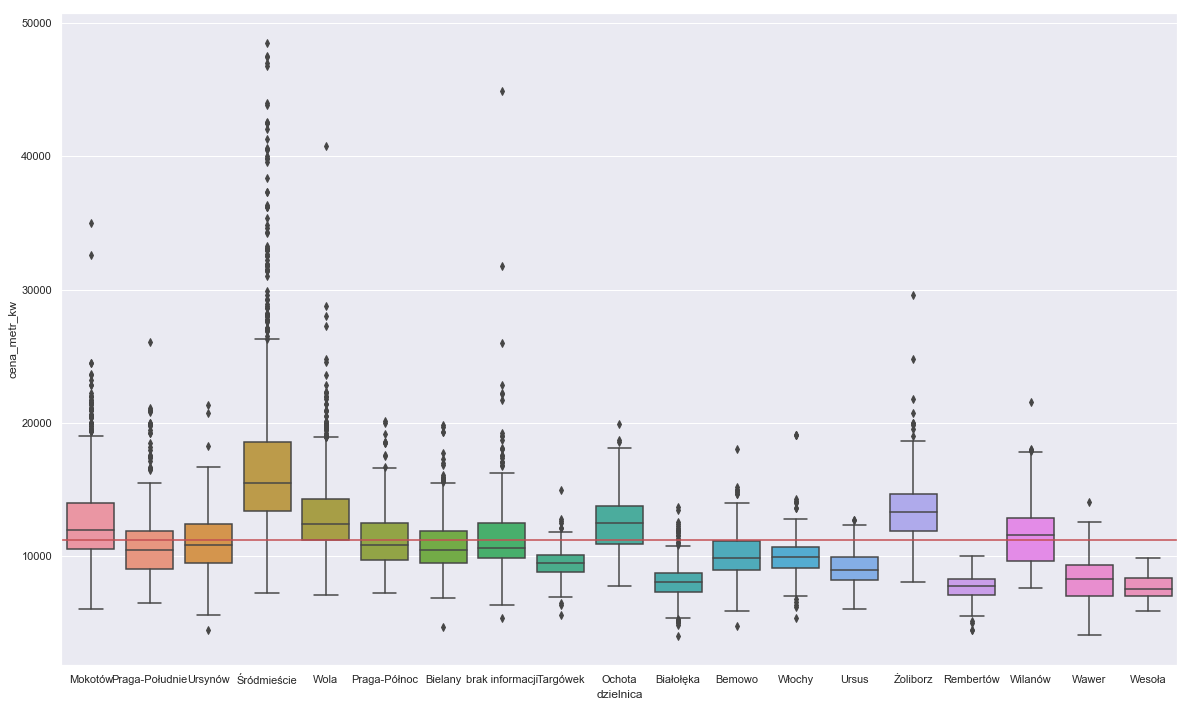

In [343]:
plt.figure(figsize=(20,12))
sns.boxplot(x="dzielnica", y="cena_metr_kw", data=df[df.pokoje>0])
plt.axhline(y=df.cena_metr_kw.median(),color='r')#srednia dla całego miasta

In [344]:
round(df.groupby('dzielnica')[['cena','cena_metr_kw']].median().sort_values(by='cena_metr_kw',ascending=False).reset_index(),2)

,dzielnica,cena,cena_metr_kw
0,Śródmieście,868500.0,15511.0
1,Żoliborz,760000.0,13333.0
2,Ochota,650000.0,12500.0
3,Wola,617000.0,12438.0
4,Mokotów,696345.0,11946.0
5,Wilanów,833100.0,11621.0
6,Ursynów,660000.0,10854.0
7,Praga-Północ,540000.0,10795.0
8,brak informacji,539000.0,10600.0
9,Praga-Południe,551800.0,10466.0


In [345]:
round(df.groupby('dzielnica')[['cena','cena_metr_kw']].mean().sort_values(by='cena_metr_kw',ascending=False).reset_index(),2)

,dzielnica,cena,cena_metr_kw
0,Śródmieście,1303127.99,17104.40
1,Żoliborz,1031038.68,13601.35
2,Wola,753855.52,13148.41
3,Mokotów,939458.89,12528.17
4,Ochota,798756.30,12503.59
5,brak informacji,662556.06,11668.47
6,Wilanów,1027449.04,11546.53
7,Praga-Północ,640578.75,11342.69
8,Bielany,641865.28,10963.26
9,Ursynów,748736.40,10889.74


In [346]:
df[df.dzielnica=='Mokotów']

,numer_ogloszenia,tytul,cena,cena_za_metr,lokalizacja,atrybuty,wartosci,opis,pietro,powierzchnia,pokoje,oplaty,pietra_w_bud,typ_zab,rok_budowy,material,cena_metr_kw,dzielnica
0,18538799,"44,18m2 | Kamienica | Stary Mokotów | Metro |",624000,"14 124,04 zł/m","[Warszawa, Mokotów, mazowieckie]","[Powierzchnia w m2, Liczba pokoi, Piętro, Forma własności, Stan, Rok budowy, Typ zabudowy, Materiał budynku, Liczba pięter w budynku, Numer referencyjny]","[44,18 m, 2, 1, własność, wysoki standard, 1949, kamienica, cegła, 3, gratka-322/9140/OMS]","Powierzchnia w m2 44,18 m Liczba pokoi 2 Piętro 1 Forma własności własność Stan wysoki standard Rok budowy 1949 Typ zabudowy kamienica Materiał budynku cegła Liczba pięter w budynku 3 Numer referencyjny gratka-322/9140/OMS",1,44,2,NaN,3,kamienica,1949,cegła,14124,Mokotów
1,18483261,"Stary Mokotów - 4 pokojowe, 62 m2",690000,"11 184,96 zł/m","[Warszawa, Mokotów, mazowieckie]","[Powierzchnia w m2, Liczba pokoi, Piętro, Forma własności, Stan, Rok budowy, Materiał budynku, Liczba pięter w budynku, Czy mieszkanie ma łazienkę?, Numer referencyjny]","[61,69 m, 4, 1, własność, do remontu, 1975, rama H, 4, tak, gratka-3756/4790/OMS]","Powierzchnia w m2 61,69 m Liczba pokoi 4 Piętro 1 Forma własności własność Stan do remontu Rok budowy 1975 Materiał budynku rama H Liczba pięter w budynku 4 Czy mieszkanie ma łazienkę? tak Numer referencyjny gratka-3756/4790/OMS",1,61,4,NaN,4,NaN,1975,rama,11184,Mokotów
2,18508193,"Mieszkanie, sprzedaż, 38.00, Warszawa, Mokotów, Służew",539000,"14 184,21 zł/m","[Warszawa, Mokotów, mazowieckie]","[Powierzchnia w m2, Liczba pokoi, Piętro, Forma własności, Rok budowy, Typ zabudowy, Materiał budynku, Liczba pięter w budynku, Miejsce parkingowe, Liczba miejsc parkingowych, Forma kuchni, Czy mieszkanie ma łazienkę?, Numer referencyjny, Forma / wyposażenie łazienki]","[38 m, 2, 2, własność, 2017, apartamentowiec, cegła, 5, w garażu, 1, w aneksie, tak, gratka-203, osobne WC]",Powierzchnia w m2 38 m Liczba pokoi 2 Piętro 2 Forma własności własność Rok budowy 2017 Typ zabudowy apartamentowiec Materiał budynku cegła Liczba pięter w budynku 5 Miejsce parkingowe w garażu Liczba miejsc parkingowych 1 Forma kuchni w aneksie Czy mieszkanie ma łazienkę? tak Numer referencyjny gratka-203 Forma / wyposażenie łazienki osobne WC,2,38,2,NaN,5,apartamentowiec,2017,cegła,14184,Mokotów
9,18526851,Komfortowy czteropokojowy apartament z ogródkiem,1700000,"11 643,84 zł/m","[Warszawa, Mokotów, mazowieckie]","[Powierzchnia w m2, Liczba pokoi, Piętro, Forma własności, Rok budowy, Typ zabudowy, Liczba pięter w budynku, Liczba miejsc parkingowych, Forma kuchni, Czy mieszkanie ma łazienkę?, Numer referencyjny]","[146 m, 4, parter, własność, 2001, apartamentowiec, 2, 1, w aneksie, tak, gratka-10411/4595/OMS]",Powierzchnia w m2 146 m Liczba pokoi 4 Piętro parter Forma własności własność Rok budowy 2001 Typ zabudowy apartamentowiec Liczba pięter w budynku 2 Liczba miejsc parkingowych 1 Forma kuchni w aneksie Czy mieszkanie ma łazienkę? tak Numer referencyjny gratka-10411/4595/OMS,NaN,146,4,NaN,2,apartamentowiec,2001,NaN,11643,Mokotów
13,18536539,2 POK W OS. ARBUZOWA Z GARAŻEM I WYPOSAŻENIEM,545000,"11 595,74 zł/m","[Warszawa, Mokotów, mazowieckie]","[Powierzchnia w m2, Liczba pokoi, Piętro, Forma własności, Stan, Rok budowy, Typ zabudowy, Materiał budynku, Liczba pięter w budynku, Liczba miejsc parkingowych, Forma kuchni, Czy mieszkanie ma łazienkę?, Numer referencyjny]","[47 m, 2, 3, spółdzielcze własnościowe, dobry, 1986, blok, rama H, 3, 1, oddzielna, tak, gratka-1065/6110/OMS]",Powierzchnia w m2 47 m Liczba pokoi 2 Piętro 3 Forma własności spółdzielcze własnościowe Stan dobry Rok budowy 1986 Typ zabudowy blok Materiał budynku rama H Liczba pięter w budynku 3 Liczba miejsc parkingowych 1 Forma kuchni oddzielna Czy mieszkanie ma łazienkę? tak Numer referencyjny gratka-1065/6110/OMS,3,47,2,NaN,3,blok,1986,rama,11595,Mokotów
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8566,1792

<Figure size 1440x864 with 0 Axes>

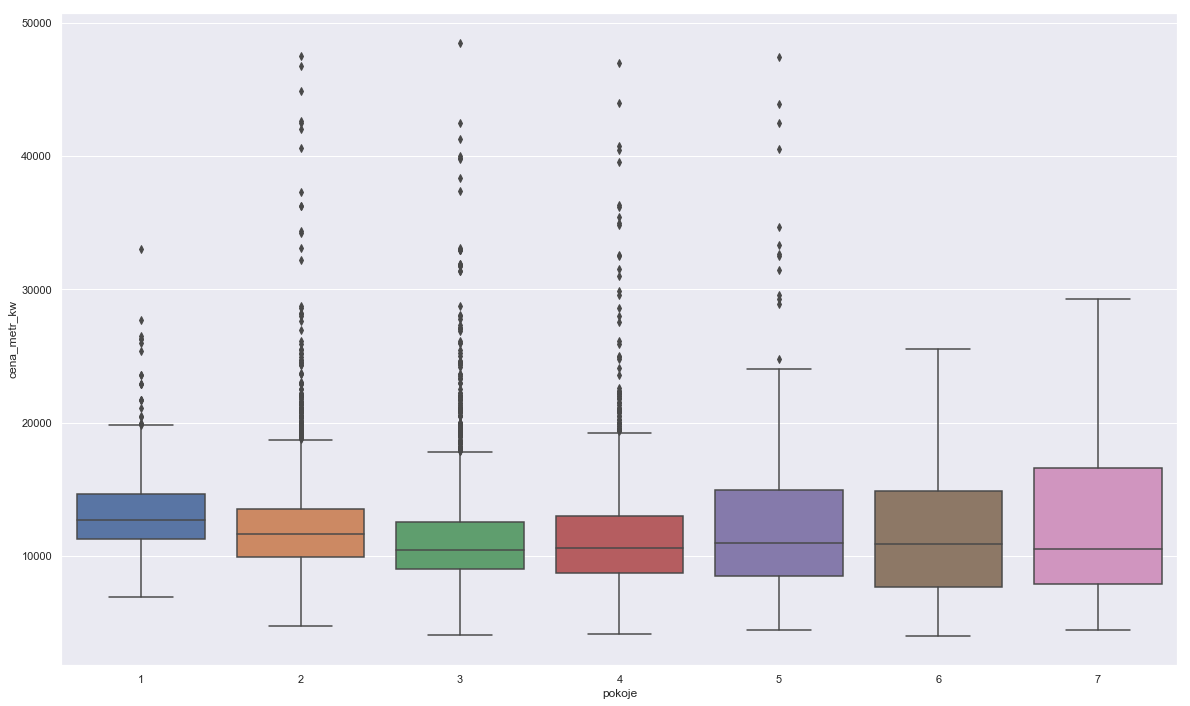

In [347]:
plt.figure(figsize=(20,12))
sns.boxplot(x="pokoje", y="cena_metr_kw", data=df[df.pokoje>0])

In [348]:
round(df[df.pokoje>0].groupby("pokoje").agg({'cena_metr_kw':['median','mean']}))

cena_metr_kw         
             median     mean
pokoje                      
1             12738  13190.0
2             11672  12179.0
3             10495  11343.0
4             10600  11645.0
5             10991  12579.0
6             10897  11944.0
7             10531  12323.0

In [350]:
# df.groupby([(pd.cut(df['powierzchnia'], bins=bins),'dzielnica').powierzchnia.count()

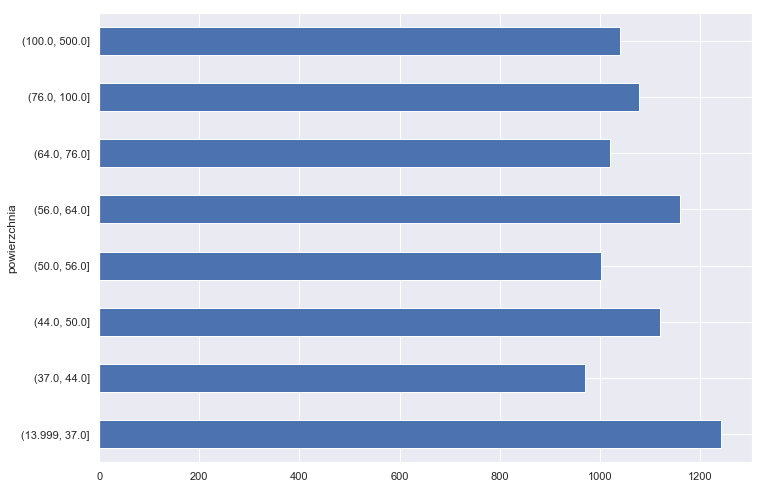

In [351]:
#bins = [0, 35, 45,55, 65,75,90,120, 1000]
df_to_plot = df.groupby(pd.qcut(df['powierzchnia'], q=8)).powierzchnia.count()
df_to_plot.plot(kind='barh')

In [352]:
df['powierzchnia_bins']=pd.qcut(df['powierzchnia'], q=8)

In [353]:
df.columns

Index(['numer_ogloszenia', 'tytul', 'cena', 'cena_za_metr', 'lokalizacja',
       'atrybuty', 'wartosci', 'opis', 'pietro', 'powierzchnia', 'pokoje',
       'oplaty', 'pietra_w_bud', 'typ_zab', 'rok_budowy', 'material',
       'cena_metr_kw', 'dzielnica', 'powierzchnia_bins'],
      dtype='object')

In [354]:
def count_below_mean(dataframe_series):
    sum(i > np.mean(dataframe_series) for i in dataframe_series)
    return dataframe_series

In [355]:
round(df.groupby(['dzielnica','powierzchnia_bins']).agg({'cena_metr_kw':['median','mean'],'cena':['median','mean','count']}),2)

cena_metr_kw                 cena  \
                                        median      mean     median   
dzielnica       powierzchnia_bins                                     
Bemowo          (13.999, 37.0]         12000.0  11924.02   392000.0   
                (37.0, 44.0]           11415.0  11230.65   459000.0   
                (44.0, 50.0]           10193.0  10238.68   480000.0   
                (50.0, 56.0]           10078.0  10326.94   550000.0   
                (56.0, 64.0]            9472.5   9614.27   575280.0   
                (64.0, 76.0]            9473.0   9834.20   670000.0   
                (76.0, 100.0]           9730.0   9808.42   808500.0   
                (100.0, 500.0]          8450.0   8820.67   966814.0   
Białołęka       (13.999, 37.0]          8921.0   9131.64   303777.0   
                (37.0, 44.0]            8135.0   8479.83   339000.0   
                (44.0, 50.0]            8258.0   8495.33   398000.0   
                (50.0, 56.0]            7847.5   7939.71   420375.0   
                (56.0, 64.0]            7601.5   8014.24   467070.5   
                (64.0, 76.0]            8113.0   8104.75   572000.0   
                (76.0, 100.0]           7692.0   7353.81   621849.0   
                (100.0, 500.0]          6509.0   6443.97   769000.0   
Bielany         (13.999, 37.0]         12176.0  12760.24   382500.0   
                (37.0, 44.0]           10751.0  11217.90   420000.0   
                (44.0, 50.0]           10312.0  10649.39   495000.0   
                (50.0, 56.0]           10271.0  10479.08   567000.0   
                (56.0, 64.0]           10000.0   9891.91   610000.0   
                (64.0, 76.0]           10391.0  10485.51   729000.0   
                (76.0, 100.0]          10230.0  11046.70   920000.0   
                (100.0, 500.0]         11892.0  11298.88  1480000.0   
Mokotów         (13.999, 37.0]         12956.5  13517.38   407450.0   
                (37.0, 44.0]           11985.0  12123.61   483635.0   
                (44.0, 50.0]           11346.0  11740.55   550000.0   
                (50.0, 56.0]           11548.0  11757.77   615000.0   
                (56.0, 64.0]           11150.0  11349.76   675325.0   
                (64.0, 76.0]           12159.0  12294.41   830000.0   
                (76.0, 100.0]          13333.0  13364.69  1116251.0   
                (100.0, 500.0]         13553.0  13560.88  1700000.0   
Ochota          (13.999, 37.0]         12798.0  13148.76   412000.0   
                (37.0, 44.0]           12207.0  12361.31   484000.0   
                (44.0, 50.0]           11911.5  12465.79   552500.0   
                (50.0, 56.0]           10907.0  11613.77   599000.0   
                (56.0, 64.0]           12000.0  12408.85   725000.0   
                (64.0, 76.0]           12876.0  12336.22   940000.0   
                (76.0, 100.0]          12812.0  12467.72  1049000.0   
                (100.0, 500.0]         12500.0  12336.33  1515000.0   
Praga-Południe  (13.999, 37.0]         11792.5  11789.96   375000.0   
                (37.0, 44.0]           11289.0  11244.43   450000.0   
                (44.0, 50.0]           10315.0  10674.95   485000.0   
                (50.0, 56.0]            9942.5  10271.81   520000.0   
                (56.0, 64.0]            9513.5  10039.60   576550.0   
                (64.0, 76.0]           10405.0  10628.76   749000.0   
                (76.0, 100.0]           9861.5  10331.12   825000.0   
                (100.0, 500.0]         10936.0  11741.27  1248000.0   
Praga-Północ    (13.999, 37.0]         13277.5  12920.46   360000.0   
                (37.0, 44.0]           10795.0  11269.21   448000.0   
                (44.0, 50.0]           10031.5  10469.00   475000.0   
                (50.0, 56.0]            9800.0   9983.66   525000.0   
                (56.0, 64.0]           10566.0  11256.88   641377.0   
                (64.0, 76.0]           11268.0  11230.63  

In [356]:
#generalnie wszystko ponizej srednie powinno juz byc dobrą inwestycją

In [357]:
df[(df['powierzchnia_bins'].astype(str) == str(pd.Interval(left=56.0, right=63.0))) & (df['dzielnica']=='Wola')& (df['cena_metr_kw']<10482)]

,numer_ogloszenia,tytul,cena,cena_za_metr,lokalizacja,atrybuty,wartosci,opis,pietro,powierzchnia,pokoje,oplaty,pietra_w_bud,typ_zab,rok_budowy,material,cena_metr_kw,dzielnica,powierzchnia_bins


In [358]:
df.groupby(['dzielnica','pokoje']).agg({'cena_metr_kw':['median','mean','min', 'max']})

cena_metr_kw                            
                             median          mean    min    max
dzielnica       pokoje                                         
Bemowo          0            5536.0   5536.000000   5536   5536
                1           11718.0  11456.972973   8400  14029
                2           10961.0  10793.671642   4758  13750
                3            9647.0   9884.065327   6893  15000
                4            9231.0   9238.360000   5932  15219
                5            8128.0   9101.000000   7000  18019
                6            9381.0   8709.000000   6875   9871
Białołęka       1            9317.0   9255.891892   7465  13486
                2            8271.0   8485.028455   5746  13709
                3            7619.0   7805.442231   4888  12598
                4            7929.0   7773.952381   5211  10185
                5            6538.0   6565.400000   5114   8664
                6            5547.0   5474.000000   4045   6830
                7            8387.0   8387.000000   8387   8387
Bielany         0            8583.0   8583.000000   8583   8583
                1           13387.0  13977.333333  10500  19677
                2           10729.0  11034.869919   8311  17750
                3           10178.0  10613.105590   4716  19843
                4           10165.0  10580.484848   7133  17276
                5            7627.0   8819.900000   7133  16075
                7           13596.0  13596.000000  13596  13596
Mokotów         0           10201.0   9836.333333   6406  11500
                1           12694.0  13255.263158   8947  22882
                2           12131.0  12503.190476   8215  24500
                3           11504.0  12205.824910   7909  24515
                4           11946.0  13002.380734   7192  34964
                5           12950.5  12791.263158   7142  21596
                6           15324.0  13690.307692   7412  20496
                7           11888.5  11888.500000   6024  17753
Ochota          0           11763.5  11763.500000   9628  13899
                1           12896.5  13465.534483  10714  18043
                2           12213.5  12521.375000   9400  18725
                3           11665.0  12069.527273   7794  17524
                4           12857.0  12298.196429   7990  18589
                5           12500.0  12334.181818   8872  18010
                7           14480.5  14480.500000   9075  19886
Praga-Południe  0           12328.5  12328.500000   9811  14846
                1           11852.0  11901.543210   9382  16590
                2           10586.0  10894.051793   7971  19867
                3            9904.5  10400.865672   6659  26097
                4            9994.0  10379.571429   7165  20919
                5            9125.5  10548.636364   6540  20952
                6           11597.0  12807.833333   9838  20790
                7           18759.5  18759.500000  17593  19926
Praga-Północ    0            8723.0   8723.000000   8723   8723
                1           13303.0  13056.216216   7932  20000
                2           11090.0  11378.947368   8302  20147
                3            9950.0  10352.986842   7254  17614
                4           10600.0  11784.324324   8168  19148
                5           11168.0  11001.750000   8282  12893
Rembertów       1            8894.0   8651.600000   7591   9238
                2            7790.0   7751.090909   6280   8630
                3            7683.0   7775.000000   5533  10000
                4            7807.5   7000.700000   5021   8272
                5            6509.0   6496.200000   4492   7486
                7            4444.0   4444.000000   4444   4444
Targówek        0           11521.0  11521.000000  11521  11521
                1           10769.0  10795.045455   9903  12090
                2            9574.0   9899.556452   6470  14983
                3            9259.0   9155.550725   695

In [359]:
round(df.groupby(['dzielnica',]).agg({'cena_metr_kw':['median','mean'],'cena':['median','mean'],'powierzchnia':['median','mean']}),2)

cena_metr_kw              cena             powierzchnia       
                      median      mean  median        mean       median   mean
dzielnica                                                                     
Bemowo                9883.0  10125.53  596500   633682.58         62.0  63.81
Białołęka             8047.5   8120.93  439000   464143.15         54.0  58.38
Bielany              10456.0  10963.26  549000   641865.28         52.0  58.86
Mokotów              11946.0  12528.17  696345   939458.89         60.0  73.21
Ochota               12500.0  12503.59  650000   798756.30         55.0  63.78
Praga-Południe       10466.0  10798.57  551800   644829.38         54.0  59.51
Praga-Północ         10795.0  11342.69  540000   640578.75         50.0  56.72
Rembertów             7790.0   7612.00  480000   480761.25         60.0  66.40
Targówek              9493.5   9515.96  469000   517724.65         52.0  55.44
Ursus                 9015.0   9166.69  465000   492946.21         50.0  54.85
Ursynów              10854.0  10889.74  660000   748736.40         64.0  71.79
Wawer                 8304.0   8257.11  548914   596652.80         69.5  76.40
Wesoła                7533.5   7722.09  525000   524511.03         64.0  69.53
Wilanów              11621.0  11546.53  833100  1027449.04         75.5  88.08
Wola                 12438.0  13148.41  617000   753855.52         49.0  57.24
Włochy                9983.0  10164.55  595000   646432.84         60.0  65.20
brak informacji      10600.0  11668.47  539000   662556.06         49.0  55.18
Śródmieście          15511.0  17104.40  868500  1303127.99         56.0  70.24
Żoliborz             13333.0  13601.35  760000  1031038.68         59.0  72.14

In [360]:
import os
def remove_jl(name):
    if os.path.exists(name):
        os.remove(name)
    else:
        print("brak pliku o takiej nazwie")  

In [361]:



# remove_jl("quoteresult.jl")
# remove_jl("quoteresult.json")